<a href="https://colab.research.google.com/github/fax117/machine_learning_practices/blob/main/examenes/Examen_Parcial_2_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><center>Campus Ciudad de México, 
Escuela Ingeniería y Ciencias, 
Computación</center></h1>

<h3><center>Course: TC3020.1 (Machine Learning)</center>
<center>Professor: Mauricio Rosales Rivera</center>
<center>Second Partial Evaluation</center></h3>
    
<h3><center>Date: November 2, 2021</center></h3>

---

<h3>Grade: </h3>

---
<h4><center>Student's information</center></h4>
<h4>Name:</h4>
<h4>Student ID:</h4>

# 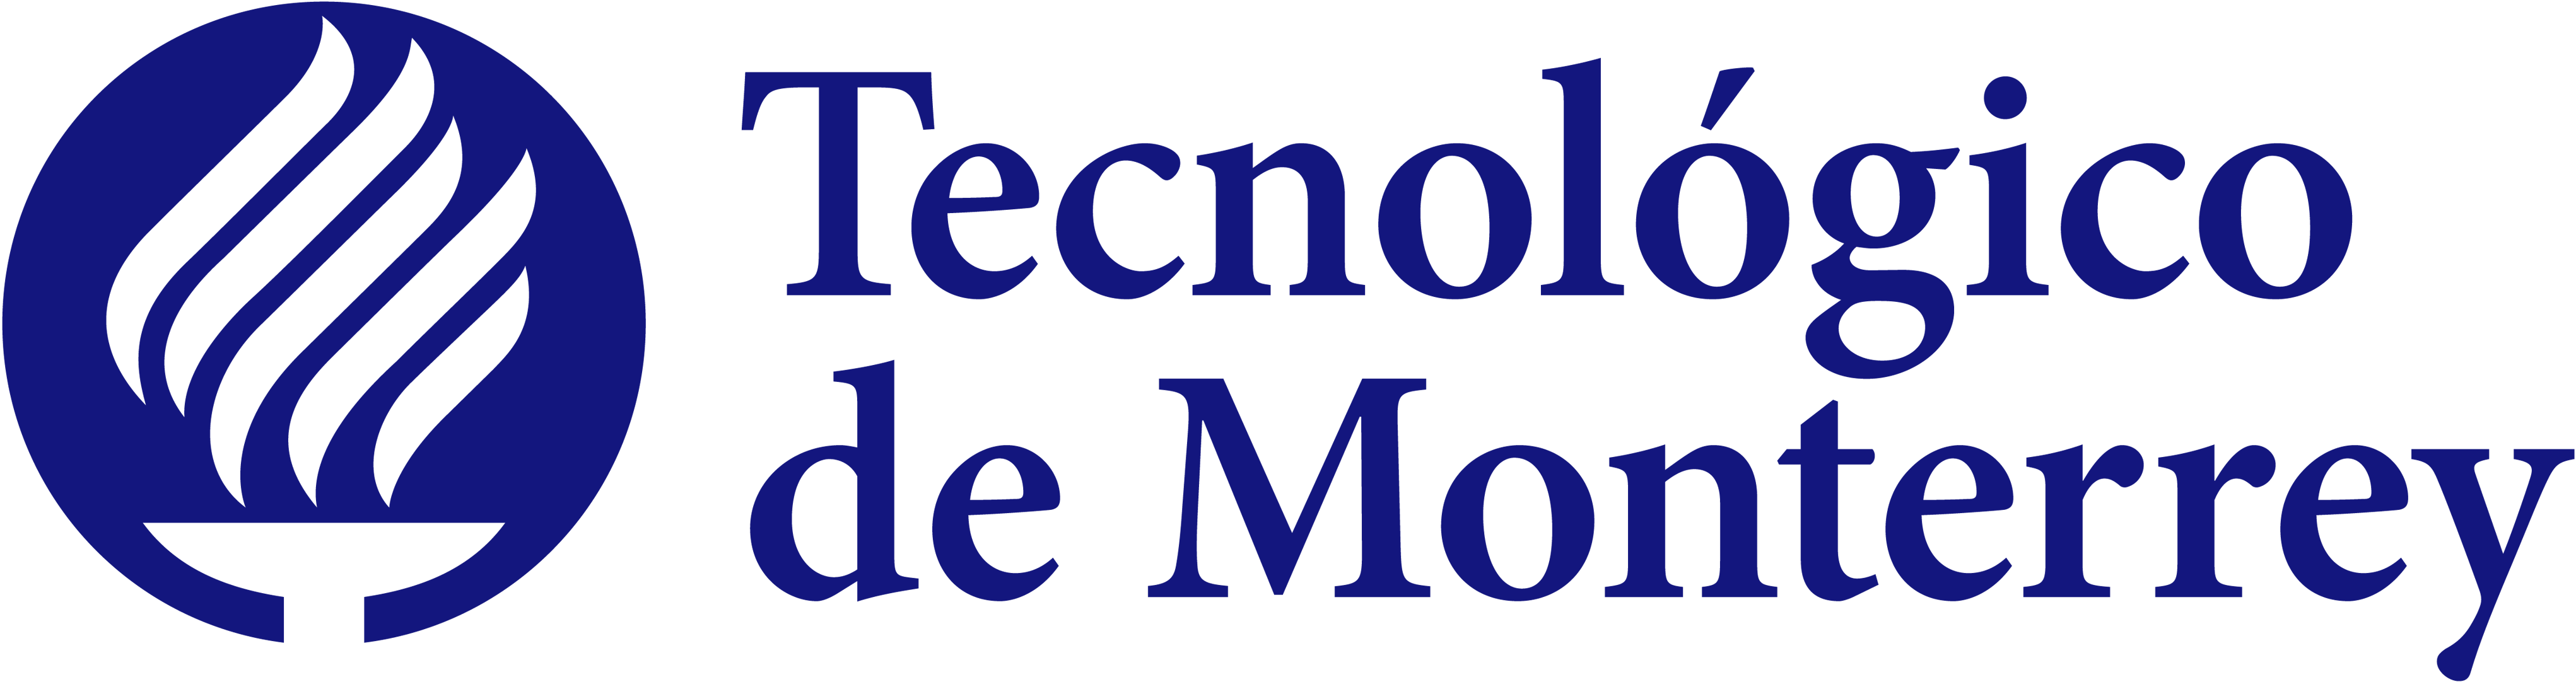

#Nombres:
### Fabricio Andre Fuentes Fuentes A0133852
### José Sebastián Reyes López    A01655218
### Luis Carlos Ordoñez           A01653435
### Pamela Arias De la Luz A01655238

$$Apegándome al Código de Ética de los Estudiantes del Tecnológico de Monterrey, me comprometo a que mi actuación en este examen esté regida por la honestidad académica. En congruencia con el compromiso adquirido al firmar dicho código, realizaré este examen de forma honesta y personal, para reflejar, a través de él, mi conocimiento y aceptar, posteriormente, la evaluación obtenida.$$

# Examen Parcial 2 - Aprendizaje Máquina

---

Inidicaciones: El examen consta de ejercicios prácticos, los cuales se abordan lo visto en los temas 3 y 4.

Se evalua el desarrollo adecuado de la metodología para el ajuste de los datos, el modelo y la precisión del mismo.

* Fecha de liberación del examen: Viernes 22 de octubre.

* Fecha límite de entrega: Martes 2 de noviembre hasta las 23:59 hrs

Esta notebook deberá contener el nombre completo, matrícula y el link correspondiente al GitHub de cada integrante.

En caso de no tener la información aquí solicitada, no se evaluará el examen.

---
# Sección 1

### Ingeniería de Características

---

Tomando como referencia la información en la notebook <font color=red>"Feature_Engineering"</font>, deberán utilizar los archivos de <font color=blue>"train.csv"</font> y <font color=green>"test.csv"</font> como punto de referencia.

En esta notebook se realiza una parte importante del pre-procesamiento, que es la ingeniería de características, donde a partir del análisis estadístico preliminar, podríamos sustituir, ajustar, imputar datos o crear nuevas variables con fines prácticos.

----

Idea: Aplicar su propio pipeline para replicar o mejorar los resultados de predicción de los diversos algoritmos puestos en dicha notebook. Pueden enfocarse solamente en los primeros 5 algoritmos que tuvieron un desempeño mayor al 79% en este ejercicio.

----

En cada apartado, deberán explicar el preprocesamiento que realizaron, así como el porqué es conveniente (o no) aplicar validación cruzada (CV) y gridsearch.

In [145]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

test_df = pd.read_csv('https://raw.githubusercontent.com/MauricioRR-Tec/AprendizajeAutomatico/main/Examen_Parcial_2/data/test.csv')
train_df = pd.read_csv('https://raw.githubusercontent.com/MauricioRR-Tec/AprendizajeAutomatico/main/Examen_Parcial_2/data/train.csv')
train_df.info()
print('_'*40)
test_df.info()
train_df.describe()

2021-11-04 07:39:42 [matplotlib.pyplot] DEBUG: Loaded backend module://ipykernel.pylab.backend_inline version unknown.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenger

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [146]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Crease, Mr. Ernest James",male,1601,C23 C25 C27,S
freq,1,577,7,4,644


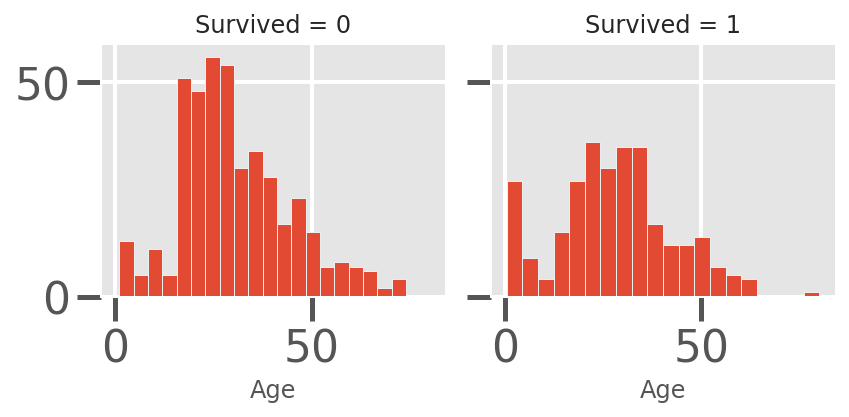

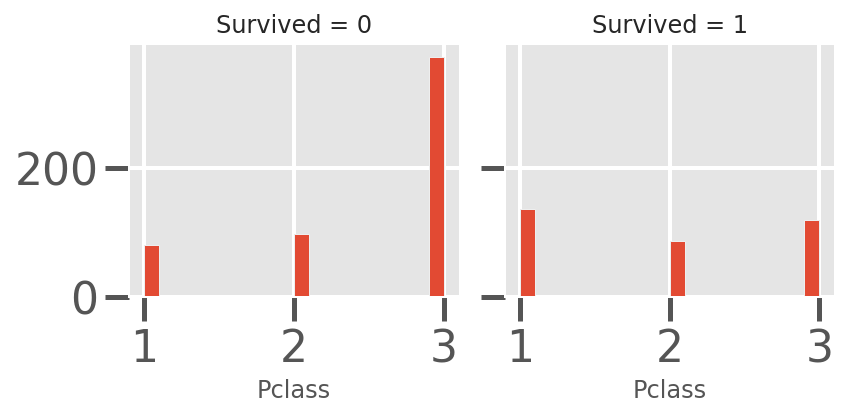

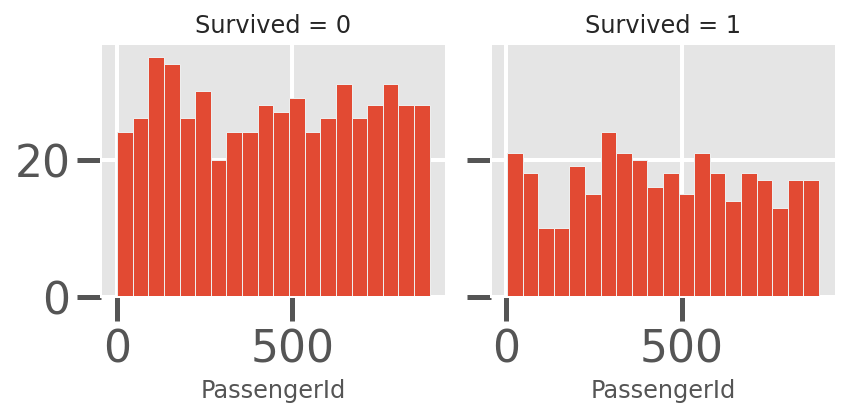

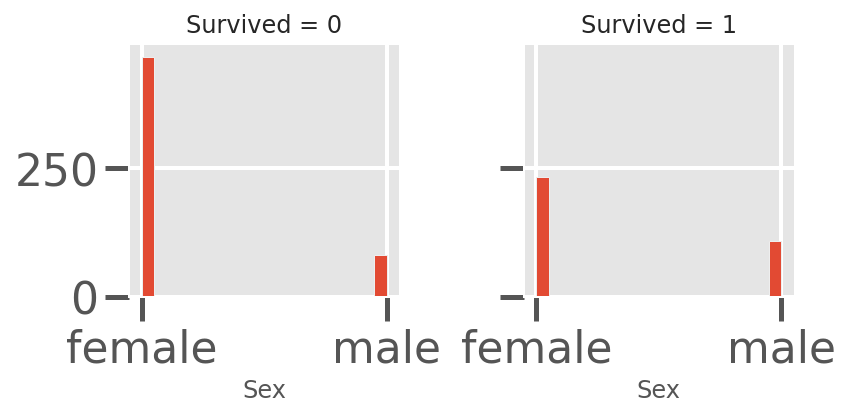

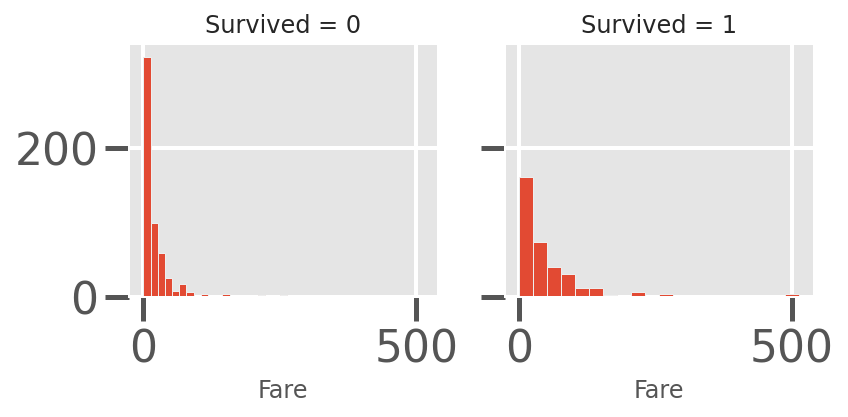

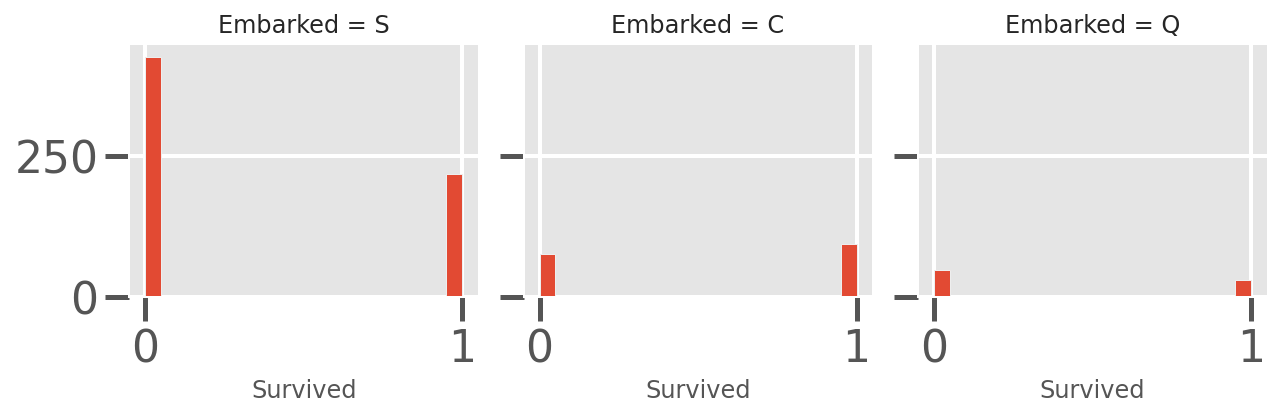

In [147]:
#Debido a que Cabin tiene tan poca infromación agregar los datos faltantes alteraría en sobremanera la información del dataframe 
train_df=train_df.drop('Cabin',axis=1)
test_df=test_df.drop('Cabin',axis=1)
#De igual froma con Ticket, pues tiene un porcentaje de repetidos considerable además de que no ofrece infromación relevante
train_df=train_df.drop('Ticket',axis=1)
test_df=test_df.drop('Ticket',axis=1)
#Debido a los pocos valores faltantes en Embarked, se compensarán con el valor más frecuente que además tiene mucha presencia por lo que no corromperá los datos
Embarked_train_freq = train_df.Embarked.dropna().mode()[0]
Embarked_test_freq = test_df.Embarked.dropna().mode()[0]
train_df['Embarked'] = train_df['Embarked'].fillna(Embarked_train_freq)
test_df['Embarked'] = test_df['Embarked'].fillna(Embarked_test_freq)
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)
g1 = sns.FacetGrid(train_df, col='Survived')
g1.map(plt.hist, 'Pclass', bins=20)
g1 = sns.FacetGrid(train_df, col='Survived')
g1.map(plt.hist, 'PassengerId', bins=20)
g1 = sns.FacetGrid(train_df, col='Survived')
g1.map(plt.hist, 'Sex', bins=20)
g1 = sns.FacetGrid(train_df, col='Survived')
g1.map(plt.hist, 'Fare', bins=20)
g1 = sns.FacetGrid(train_df, col='Embarked')
g1.map(plt.hist, 'Survived', bins=20)

In [148]:
#Se puede observar que la variable PassengerId no presenta una clara relación entre la supervivencia y la variable por lo que se descartará
train_df=train_df.drop('PassengerId',axis=1)
test_df=test_df.drop('PassengerId',axis=1)
#Realizamos one hot encoding a las variables de Sex y Embarked
train_df['Sex'] = train_df['Sex'].map( {'female': 1, 'male': 0} ).astype(int)
test_df['Sex'] = test_df['Sex'].map( {'female': 1, 'male': 0} ).astype(int)
train_df['Embarked'] = train_df['Embarked'].map( {'S': 0, 'Q': 1, 'C': 2} ).astype(int)
test_df['Embarked'] = test_df['Embarked'].map( {'S': 0, 'Q': 1, 'C': 2} ).astype(int)
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,2
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,0
4,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,0


In [149]:
#Extraemos los titulos de los nombres
combine=[train_df,test_df]
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
train_df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,0,Mr
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,2,Mrs
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,0,Miss
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,0,Mrs
4,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,0,Mr
...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,13.0000,0,Rev
887,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,30.0000,0,Miss
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,NaN,1,2,23.4500,0,Miss
889,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,30.0000,2,Mr


In [150]:
train_df.Title.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [151]:
#Se tratan para englobar en one hot encoding los titulos en aquellos más repressentativos y los que son sinónimos
for dataset in combine:
  dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
  dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
  dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
  dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
  dataset['Title'] = dataset['Title'].map( {'Miss': 0, 'Mrs': 1, 'Master': 2, 'Mr': 3, 'Rare': 4} )
train_df=train_df.drop('Name',axis=1)
test_df=test_df.drop('Name',axis=1)
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,0,3
1,1,1,1,38.0,1,0,71.2833,2,1
2,1,3,1,26.0,0,0,7.9250,0,0
3,1,1,1,35.0,1,0,53.1000,0,1
4,0,3,0,35.0,0,0,8.0500,0,3


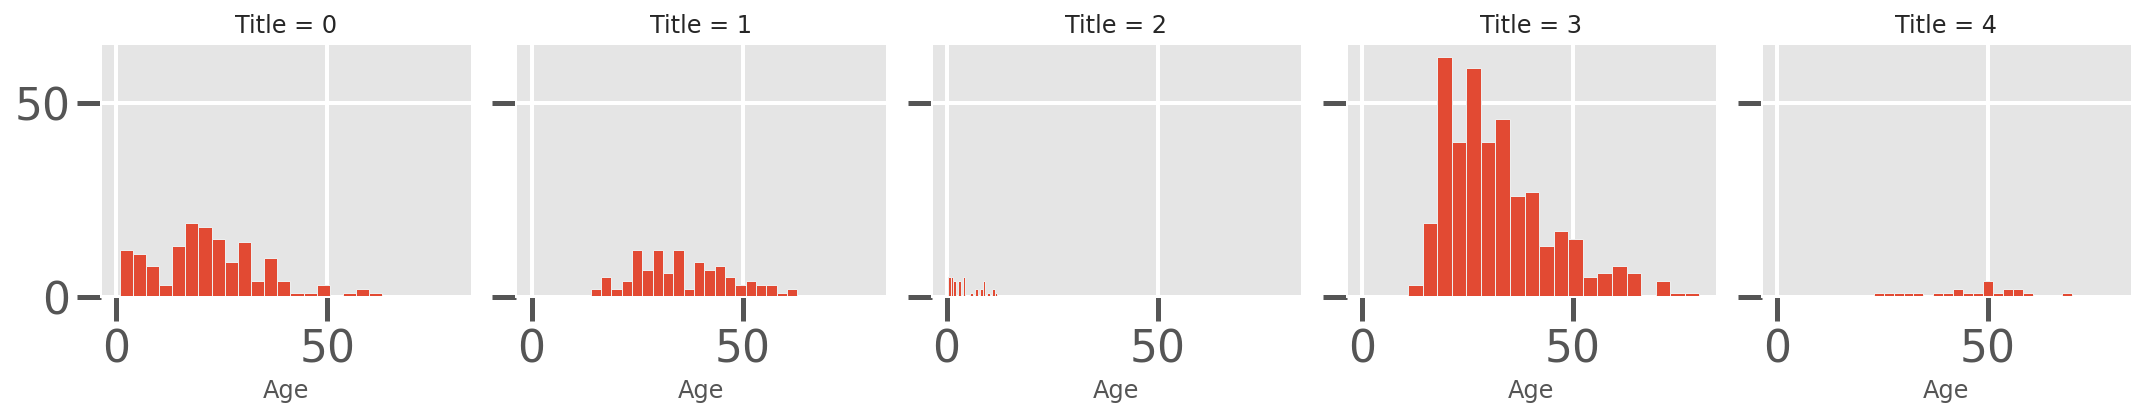

In [152]:
#Puede que exista una realción directa entre los titulos en los nombres y las edades
g1 = sns.FacetGrid(train_df, col='Title')
g1.map(plt.hist, 'Age', bins=20)

In [153]:
#Como se observa existe una relación entre el título y la edad, por ello los datos faltantes de edad seran concorde a las variable título
combine=[train_df,test_df]
for dataset in combine:
  guess_ages=[0,0,0,0,0]
  for i in range(0,5):
    guess_df = dataset[(dataset['Title'] == i)]['Age'].dropna()
    age_guess = guess_df.median()
    guess_ages[i] = int( age_guess/0.5 + 0.5 ) * 0.5
  for i in range(0,5):
    dataset.loc[ (dataset.Age.isnull()) & (dataset.Title == i),'Age'] = guess_ages[i]
  dataset['Age'] = dataset['Age'].astype(int)
train_df.info()
print('_'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    int64  
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    int64  
 8   Title     891 non-null    int64  
dtypes: float64(1), int64(8)
memory usage: 62.8 KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    int64  
 2   Age       418 non-null    int64  
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64 

In [154]:
#Se observan aún valores faltantes en Fare así que se procede a completar
for dataset in combine:
  dataset['Fare'].fillna(dataset['Fare'].dropna().median(), inplace=True)
train_df.info()
print('_'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    int64  
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    int64  
 8   Title     891 non-null    int64  
dtypes: float64(1), int64(8)
memory usage: 62.8 KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    int64  
 2   Age       418 non-null    int64  
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64 

In [155]:
#Tratamiento de variables con mayor rango
train_df['AgeBand'] = pd.cut(train_df['Age'], 8)
train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(-0.08, 10.0]",0.588235
1,"(10.0, 20.0]",0.379310
2,"(20.0, 30.0]",0.310881
3,"(30.0, 40.0]",0.482558
4,"(40.0, 50.0]",0.388235
5,"(50.0, 60.0]",0.404762
6,"(60.0, 70.0]",0.222222
7,"(70.0, 80.0]",0.250000


In [156]:
for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 10, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 10) & (dataset['Age'] <= 20), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 20) & (dataset['Age'] <= 30), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 30) & (dataset['Age'] <= 40), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 50), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 50) & (dataset['Age'] <= 60), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 60) & (dataset['Age'] <= 70), 'Age'] = 6
    dataset.loc[ dataset['Age'] > 70, 'Age'] = 7
train_df=train_df.drop('AgeBand',axis=1)
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,2,1,0,7.2500,0,3
1,1,1,1,3,1,0,71.2833,2,1
2,1,3,1,2,0,0,7.9250,0,0
3,1,1,1,3,1,0,53.1000,0,1
4,0,3,0,3,0,0,8.0500,0,3


In [157]:
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [158]:
combine = [train_df, test_df]
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train_df = train_df.drop(['FareBand'], axis=1)    
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,2,1,0,0,0,3
1,1,1,1,3,1,0,3,2,1
2,1,3,1,2,0,0,1,0,0
3,1,1,1,3,1,0,3,0,1
4,0,3,0,3,0,0,1,0,3


In [159]:
#Creación de variables con las variables existentes
combine = [train_df, test_df]
for dataset in combine:
  dataset['WithRelatives']=0
  dataset.loc[(dataset.SibSp + dataset.Parch)>0,'WithRelatives']=1
train_df = train_df.drop(['SibSp','Parch'], axis=1) 
test_df = test_df.drop(['SibSp','Parch'], axis=1) 
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,WithRelatives
0,0,3,0,2,0,0,3,1
1,1,1,1,3,3,2,1,1
2,1,3,1,2,1,0,0,0
3,1,1,1,3,3,0,1,1
4,0,3,0,3,1,0,3,0


In [160]:
combine = [train_df, test_df]
for dataset in combine:
  dataset['Age*WithRelatives']=dataset.Age*(dataset.WithRelatives+1)
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,WithRelatives,Age*WithRelatives
0,0,3,0,2,0,0,3,1,4
1,1,1,1,3,3,2,1,1,6
2,1,3,1,2,1,0,0,0,2
3,1,1,1,3,3,0,1,1,6
4,0,3,0,3,1,0,3,0,3


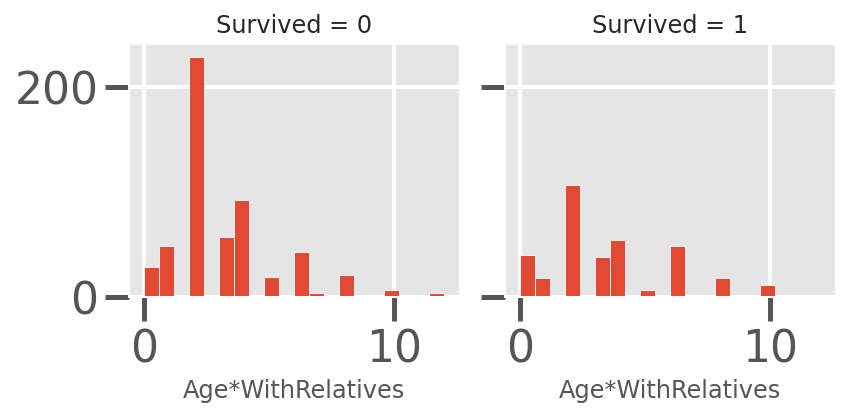

In [161]:
g1 = sns.FacetGrid(train_df, col='Survived')
g1.map(plt.hist, 'Age*WithRelatives', bins=20)

In [162]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import cross_validate

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import GridSearchCV


X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test  = test_df
X_train.shape, Y_train.shape, X_test.shape

((891, 8), (891,), (418, 8))

In [163]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

best_log_cv=0
for i, score in enumerate(cross_validate(logreg, X_train,Y_train, cv=10)["test_score"]):
    if score > best_log_cv:
      best_log_cv=score

pipeline = make_pipeline(MinMaxScaler(),SelectKBest(f_classif),LogisticRegression())
param_grid = {
    'selectkbest__k': [5,6,7,8],
    'logisticregression__C':[1,2,3,4],
    'logisticregression__max_iter':[100,200,300]
}
gridsearch = GridSearchCV(pipeline, param_grid=param_grid, cv=10,
                         scoring='accuracy', verbose=1)
gridsearch.fit(X_train, Y_train)
gridsearch_log=gridsearch.best_score_
print(' Resultado apriori:',acc_log,'\n','Resultado con CV:', (best_log_cv*100).round(2),'\n','Resultado con GridSearch:',(gridsearch_log*100).round(2))


Fitting 10 folds for each of 48 candidates, totalling 480 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


 Resultado apriori: 79.12 
 Resultado con CV: 82.02 
 Resultado con GridSearch: 78.9


[Parallel(n_jobs=1)]: Done 480 out of 480 | elapsed:    6.8s finished


In [164]:
# Linear SVC
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

best_linear_svc_cv=0
for i, score in enumerate(cross_validate(linear_svc, X_train,Y_train, cv=10)["test_score"]):
    if score > best_linear_svc_cv:
      best_linear_svc_cv=score

pipeline = make_pipeline(MinMaxScaler(),SelectKBest(f_classif),LinearSVC())
param_grid = {
    'selectkbest__k': [5,6,7,8],
    'linearsvc__C':[1,2,3,4],
    'linearsvc__intercept_scaling':[1,2,3],
    'linearsvc__max_iter':[5000]
}
gridsearch = GridSearchCV(pipeline, param_grid=param_grid, cv=10,
                         scoring='accuracy', verbose=1)
gridsearch.fit(X_train, Y_train)
gridsearch_linear_svc=gridsearch.best_score_
print(' Resultado apriori:',acc_linear_svc,'\n','Resultado con CV:', (best_linear_svc_cv*100).round(2),'\n','Resultado con GridSearch:',(gridsearch_linear_svc*100).round(2))

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

Fitting 10 folds for each of 48 candidates, totalling 480 fits
 Resultado apriori: 78.56 
 Resultado con CV: 82.02 
 Resultado con GridSearch: 78.9


[Parallel(n_jobs=1)]: Done 480 out of 480 | elapsed:   18.3s finished


In [165]:
# K-Neighbor Classifier
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

best_knn_cv=0
for i, score in enumerate(cross_validate(knn, X_train,Y_train, cv=10)["test_score"]):
    if score > best_knn_cv:
      best_knn_cv=score

pipeline = make_pipeline( MinMaxScaler(), SelectKBest(f_classif),KNeighborsClassifier())

param_grid = {
    'selectkbest__k': [5,6,7,8],
    'kneighborsclassifier__n_neighbors':[4,5,6,7,8,9],
    'kneighborsclassifier__p':[2,3,4]
}
gridsearch = GridSearchCV(pipeline, param_grid=param_grid, cv=10,
                         scoring='accuracy', verbose=1)
gridsearch.fit(X_train, Y_train)
gridsearch.best_score_
gridsearch_knn=gridsearch.best_score_

print(' Resultado apriori:',acc_knn,'\n','Resultado con CV:', (best_knn_cv*100).round(2),'\n','Resultado con GridSearch:',(gridsearch_knn*100).round(2))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 72 candidates, totalling 720 fits
 Resultado apriori: 84.62 
 Resultado con CV: 84.27 
 Resultado con GridSearch: 82.16


[Parallel(n_jobs=1)]: Done 720 out of 720 | elapsed:   11.1s finished


In [166]:
# Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

best_decision_tree_cv=0
for i, score in enumerate(cross_validate(knn, X_train,Y_train, cv=10)["test_score"]):
    if score > best_decision_tree_cv:
      best_decision_tree_cv=score

pipeline = make_pipeline( MinMaxScaler(), SelectKBest(f_classif),DecisionTreeClassifier())

param_grid = {
    'selectkbest__k': [5,6,7,8],
    'decisiontreeclassifier__criterion':["gini", "entropy"],
    'decisiontreeclassifier__min_samples_split':[2,3,4]
}
gridsearch = GridSearchCV(pipeline, param_grid=param_grid, cv=10,
                         scoring='accuracy', verbose=1)
gridsearch.fit(X_train, Y_train)
gridsearch_decision_tree=gridsearch.best_score_

print(' Resultado apriori:',acc_decision_tree,'\n','Resultado con CV:', (best_decision_tree_cv*100).round(2),'\n','Resultado con GridSearch:',(gridsearch_decision_tree*100).round(2))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 24 candidates, totalling 240 fits
 Resultado apriori: 87.88 
 Resultado con CV: 84.27 
 Resultado con GridSearch: 80.6


[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:    1.7s finished


In [167]:
# Random Forest
random_forest = RandomForestClassifier()
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

best_random_forest_cv=0
for i, score in enumerate(cross_validate(knn, X_train,Y_train, cv=10)["test_score"]):
    if score > best_random_forest_cv:
      best_random_forest_cv=score

pipeline = make_pipeline( MinMaxScaler(), SelectKBest(f_classif),RandomForestClassifier())

param_grid = {
    'selectkbest__k': [5,6,7,8],
    'randomforestclassifier__n_estimators':[100,200,300],
    'randomforestclassifier__min_samples_split':[2,3,4]
}
gridsearch = GridSearchCV(pipeline, param_grid=param_grid, cv=10,
                         scoring='accuracy', verbose=1)
gridsearch.fit(X_train, Y_train)
gridsearch_random_forest=gridsearch.best_score_

print(' Resultado apriori:',acc_random_forest,'\n','Resultado con CV:', (best_random_forest_cv*100).round(2),'\n','Resultado con GridSearch:',(gridsearch_random_forest*100).round(2))

Fitting 10 folds for each of 36 candidates, totalling 360 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:  2.2min finished


 Resultado apriori: 87.88 
 Resultado con CV: 84.27 
 Resultado con GridSearch: 81.49


In [168]:
models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 'Random Forest', 'Decision Tree','Linear SVM'],
    'Apriori_Score': [ acc_knn, acc_log,  acc_random_forest, acc_decision_tree, acc_linear_svc ],
    'CV Score': [(best_log_cv*100).round(2),(best_linear_svc_cv*100).round(2),(best_knn_cv*100).round(2),(best_decision_tree_cv*100).round(2),(best_random_forest_cv*100).round(2)],
    'GridSearch Score': [(gridsearch_log*100).round(2),(gridsearch_linear_svc*100).round(2),(gridsearch_knn*100).round(2),(gridsearch_decision_tree*100).round(2),(gridsearch_random_forest*100).round(2)]})
models.sort_values(by='Apriori_Score', ascending=False)

,Model,Apriori_Score,CV Score,GridSearch Score
2,Random Forest,87.88,84.27,82.16
3,Decision Tree,87.88,84.27,80.60
0,KNN,84.62,82.02,78.90
1,Logistic Regression,79.12,82.02,78.90
4,Linear SVM,78.56,84.27,81.49


In [169]:
#No sé si la parte del GridSearch esté bien hecha porque en general los resultados empeoraron 
#Y faltarian unas conclusiones de esta parte creo

##Quiero creer que el score de gridsearch es lo que seria una media de los resultados, y como lo hace por folds es posible que sea menor a el resto por cuestiones de ciertos folds teniendo
##resultados muy bajos. La verdad no se bien como funciona todo esto, lo que supongo es que como busca por hiperparametros, hay ciertas combinaciones que de plano no funcionan muy bien y es
##de ahi que baja el promedio, pero puede que no signifique que sea peor que el resto. Yo lo interpreto como que es mas exhaustivo y por lo mismo es un poco más bajo que el resto.

#Cómo se aprecia del resultado general de los diferentes procedimientos los datos con los que se entrenó resultaron ser optimos para tener buenos resultados en algunos casos mayores a los presentados inicialmente por lo que
#podría decirse que fue el resultado óptimo ya que en muchos de estos casos e

---
---

# Sección 2

### Recomendaciones usando técnicas de ML (Web Scrapping, Supervised, Unsupervised)

---

Tomando como referencia la información en la notebook <font color=red>"Unsupervised_Prediction"</font>, deberán utilizar los archivos de <font color=blue>"anime.csv"</font> y <font color=green>"rating.csv"</font> como punto de referencia.

En esta notebook se realiza una parte importante del pre-procesamiento. Posteriormente, la aplicación del análisis de componentes principales (PCA), k-means y la descripción de las recomendaciones para al menos 3 clusters generados.

Aplicar la técnica de webscrapping y explicar su funcionamiento (**puede tardar desde 10 minutos hasta 1 hora aproximadamente; dependiendo la cantidad de registros que hayan usado**). Tomen en cuenta que esta búsqueda va acorde a los ids del conjunto de datos que les hace falta información y, a partir de esta técnica de minería de datos, completamos los registros faltantes.

Posteriormente, entrenar el algoritmo de k-NN para obtener las distancias de cada id del conjunto de datos, para obtener los indices y distancias correspondientes que nos servirán para proporcionar recomendaciones con respecto a estos resultados.

----

Idea: Aplicar su propio pipeline para replicar los resultados de predicción/recomendación de este ejercicio.

----

En cada apartado, deberán explicar el preprocesamiento que realizaron.

In [170]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

plt.rcParams['figure.figsize'] = (6, 4)
plt.style.use('ggplot')
%config InlineBackend.figure_formats = {'png', 'retina'}

2021-11-04 07:42:40 [matplotlib.pyplot] DEBUG: Loaded backend module://ipykernel.pylab.backend_inline version unknown.


In [171]:
anime = pd.read_csv('anime.csv')
user = pd.read_csv('rating.csv')

In [172]:
MRPU = user.groupby(['user_id']).mean().reset_index()
MRPU['mean_rating'] = MRPU['rating']
MRPU.drop(['anime_id','rating'],axis=1, inplace=True)

user = pd.merge(user,MRPU,on=['user_id','user_id'])
user = user.drop(user[user.rating < user.mean_rating].index)

user = user.rename({'rating':'userRating'}, axis='columns')

In [173]:
mergedata = pd.merge(anime,user,on=['anime_id','anime_id'])
mergedata= mergedata[mergedata.user_id <= 20000]

len(mergedata['anime_id'].unique())
len(anime['anime_id'].unique())

12294

In [174]:
user_anime = pd.crosstab(mergedata['user_id'], mergedata['name'])
user_anime.head(10)

name,&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hatsukoi,&quot;Bungaku Shoujo&quot; Memoire,&quot;Bungaku Shoujo&quot; Movie,&quot;Eiji&quot;,.hack//G.U. Returner,.hack//G.U. Trilogy,.hack//G.U. Trilogy: Parody Mode,.hack//Gift,.hack//Intermezzo,.hack//Liminality,.hack//Quantum,.hack//Quantum: Sore ike! Bokura no Chimuchimu-chan!!,.hack//Roots,.hack//Sign,.hack//Tasogare no Udewa Densetsu,.hack//Tasogare no Udewa Densetsu: Offline de Aimashou,.hack//The Movie: Sekai no Mukou ni,.hack//Unison,.hack//Versus: The Thanatos Report,009 Re:Cyborg,009-1,009-1: R&amp;B,00:08,07-Ghost,1+2=Paradise,100%,100-man-nen Chikyuu no Tabi: Bander Book,1000-nen Joou: Queen Millennia,1001 Nights,11-nin Iru!,11eyes,11eyes Picture Drama,11eyes: Momoiro Genmutan,12-sai.,12-sai. 2nd Season,12-sai.: Chicchana Mune no Tokimeki,15 Bishoujo Hyouryuuki,1989,20-dai no Heya-hen,2005-nen Uchuu no Tabi,21-ji no Onna: Newscaster Katsuragi Miki,2x1,3 Choume no Tama: Onegai! Momo-chan wo Sagashite!!,3 Choume no Tama: Uchi no Tama Shirimasenka?,3-Nen C-Gumi 14-Ban Kubozono Chiyoko no Nyuukaku,3-gatsu no Lion meets Bump of Chicken,3-tsu no Kumo,30-sai no Hoken Taiiku,30-sai no Hoken Taiiku Specials,30th Gundam Perfect Mission,...,Zettai Karen Children Gentei Kaikin!! OVA Chou Sakidori Special!!,Zettai Karen Children OVA: Aitazousei! Ubawareta Mirai?,Zettai Karen Children Recap,Zettai Karen Children: The Unlimited - Hyoubu Kyousuke,Zettai Muteki Raijin-Oh,Zettai Muteki Raijin-Oh (1992),Zettai Shougeki: Platonic Heart,Zettai Shougeki: Platonic Heart Picture Drama,Zettai Shounen,Zipang,Zoids,Zoids Fuzors,Zoids Genesis,Zoids Shinseiki/Zero,Zoku Koihime,Zoku Natsume Yuujinchou,Zoku Natsume Yuujinchou: 3D Nyanko-sensei Gekijou,Zoku Sayonara Zetsubou Sensei,Zombie-Loan,Zombie-Loan Specials,"Zone of the Enders: Dolores, I",Zone of the Enders: Idolo,Zonmi-chan: Halloween☆Special Movie!,Zonmi-chan: Meat Pie of the Dead,Zutto Mae kara Suki deshita.: Kokuhaku Jikkou Iinkai,_Summer,_Summer Specials,eX-Driver,eX-Driver the Movie,eX-Driver the Movie Specials,eX-Driver: Nina &amp; Rei Danger Zone,ef: A Tale of Melodies.,ef: A Tale of Melodies. - Prologue,ef: A Tale of Memories.,ef: A Tale of Memories. - Prologue,ef: A Tale of Memories. - Recollections,fake!fake!,gdgd Fairies,gdgd Fairies 2,gdgd Fairies Movie: tte Iu Eiga wa Dou kana...?,iDOLM@STER Xenoglossia,iDOLM@STER Xenoglossia Specials,lilac (bombs Jun Togawa),makemagic,s.CRY.ed,xxxHOLiC,xxxHOLiC Kei,xxxHOLiC Movie: Manatsu no Yoru no Yume,xxxHOLiC Rou,xxxHOLiC Shunmuki
user_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [175]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca.fit(user_anime)
pca_samples = pca.transform(user_anime)

ps = pd.DataFrame(pca_samples)
ps.head()

,0,1,2
0,-1.579129,-0.500240,0.415763
1,-1.773553,-0.272593,0.116389
2,0.218814,-1.232282,-0.985802
3,0.199435,-0.291005,0.681045
4,3.532125,-0.184796,-0.743309


In [176]:
tocluster = pd.DataFrame(ps[[0,1,2]])

2021-11-04 07:43:26 [matplotlib.axes._base] DEBUG: not adjusting title pos because a title was already placed manually: 0.920000
2021-11-04 07:43:27 [matplotlib.axes._base] DEBUG: title position was updated manually, not adjusting
2021-11-04 07:43:27 [matplotlib.axes._base] DEBUG: title position was updated manually, not adjusting
2021-11-04 07:43:27 [matplotlib.axes._base] DEBUG: title position was updated manually, not adjusting
2021-11-04 07:43:27 [matplotlib.axes._base] DEBUG: title position was updated manually, not adjusting
2021-11-04 07:43:27 [matplotlib.axes._base] DEBUG: title position was updated manually, not adjusting


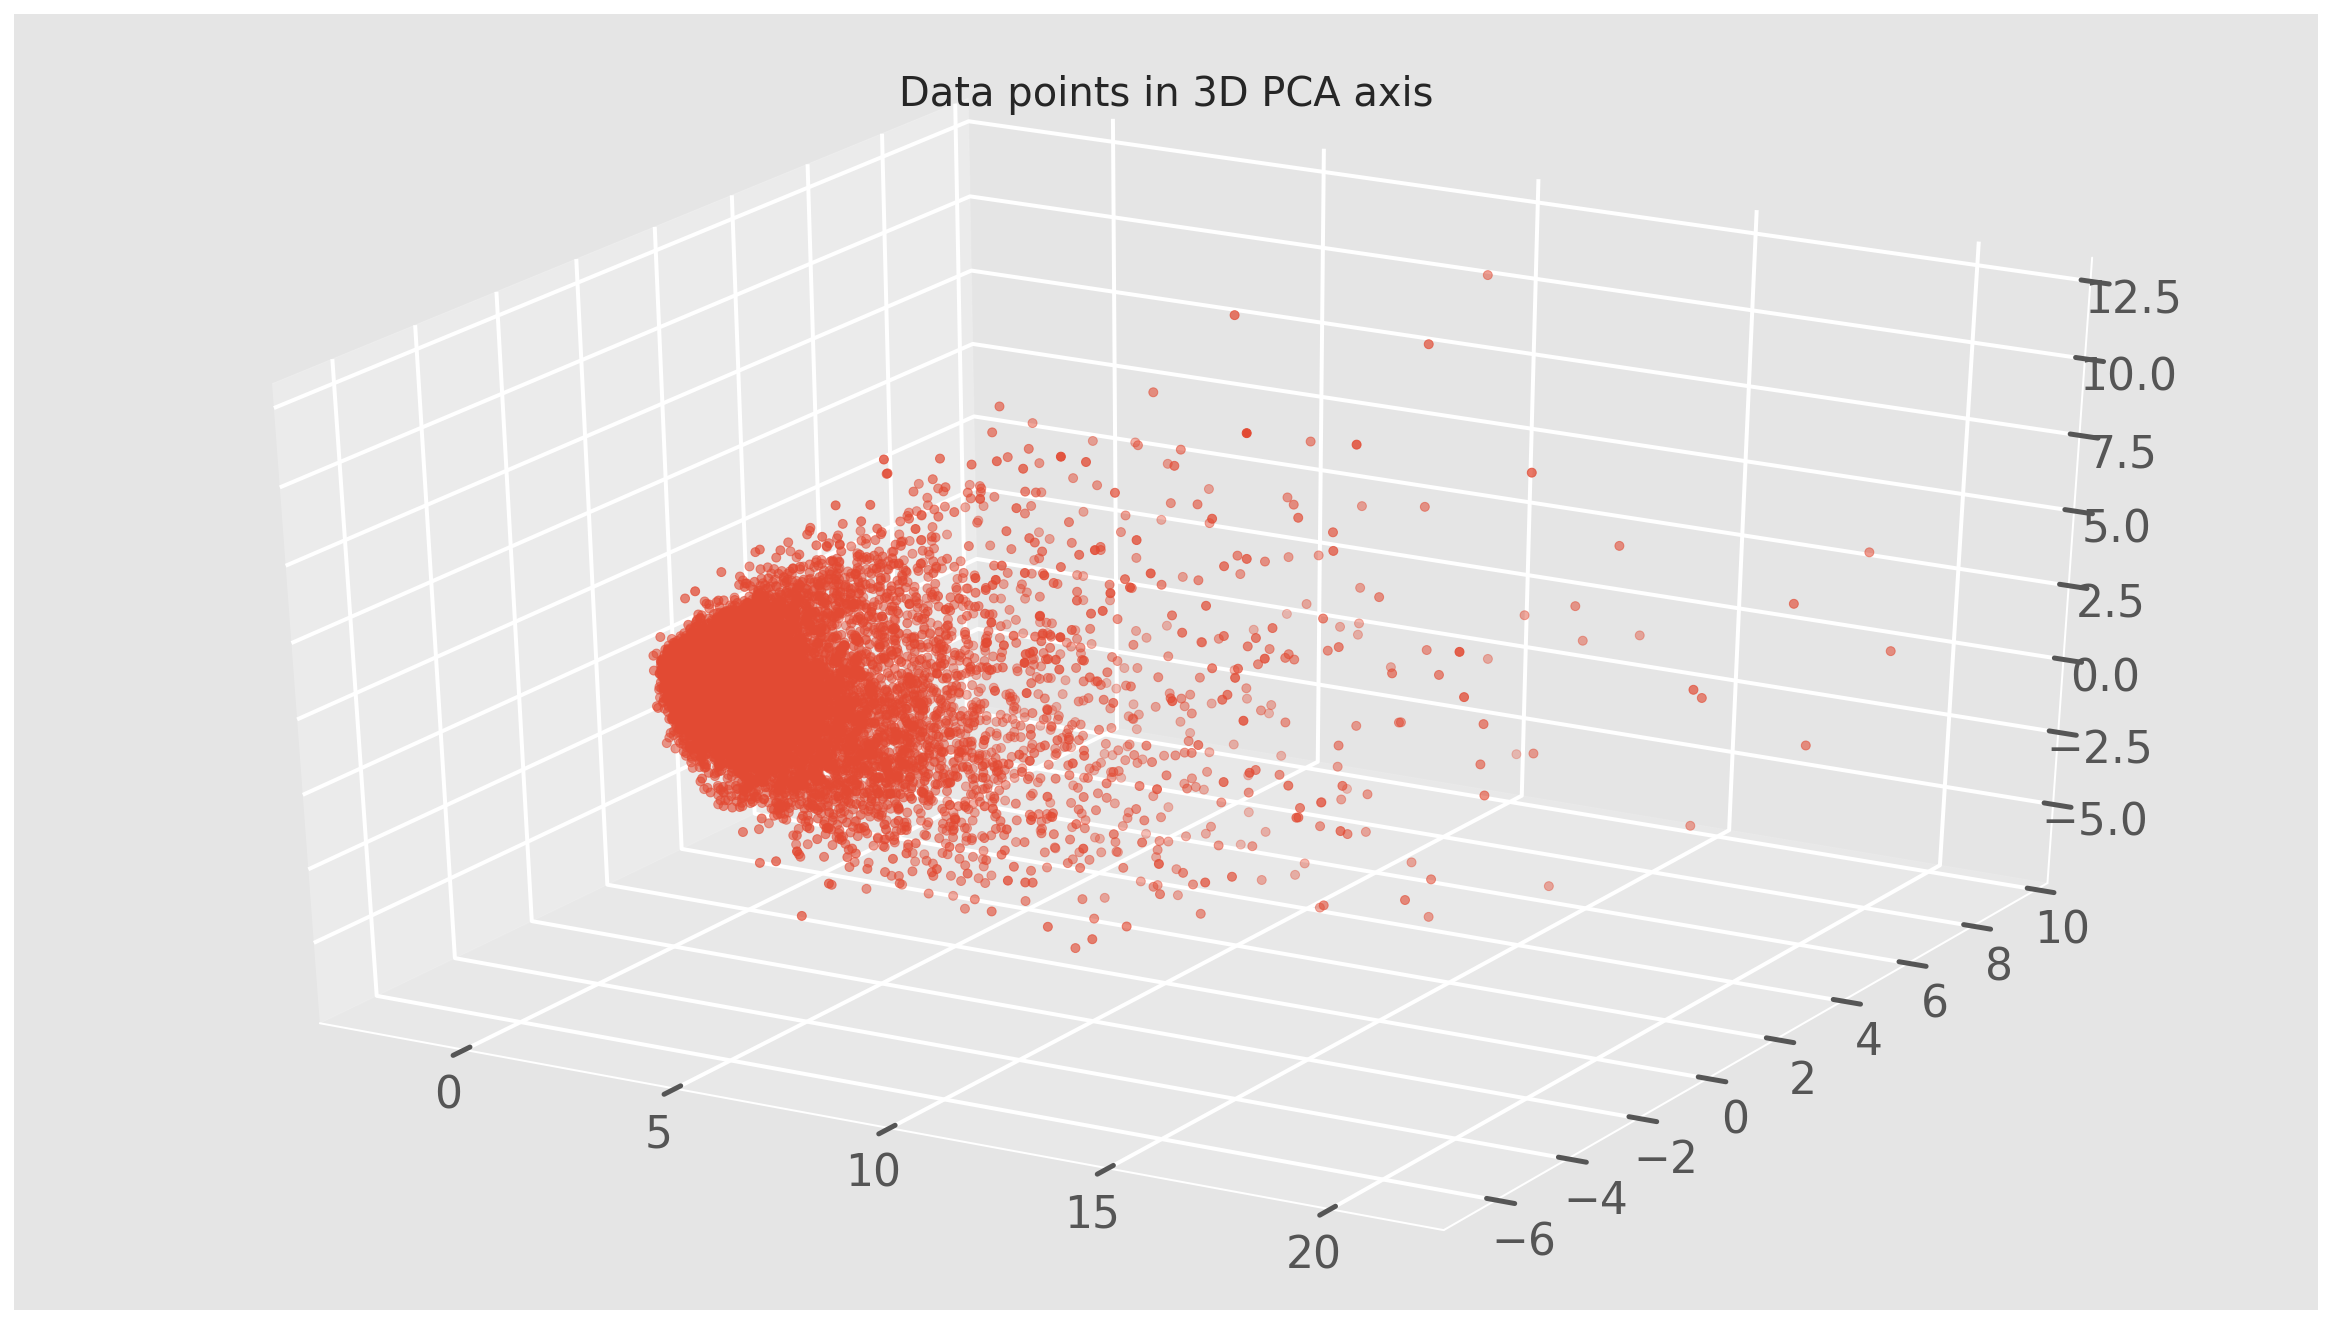

In [177]:
plt.rcParams['figure.figsize'] = (16, 9)


fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(tocluster[0], tocluster[2], tocluster[1])

plt.title('Data points in 3D PCA axis', fontsize=20)
plt.show()

In [178]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

scores = []
inertia_list = np.empty(8)

for i in range(2,8):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(tocluster)
    inertia_list[i] = kmeans.inertia_
    scores.append(silhouette_score(tocluster, kmeans.labels_))

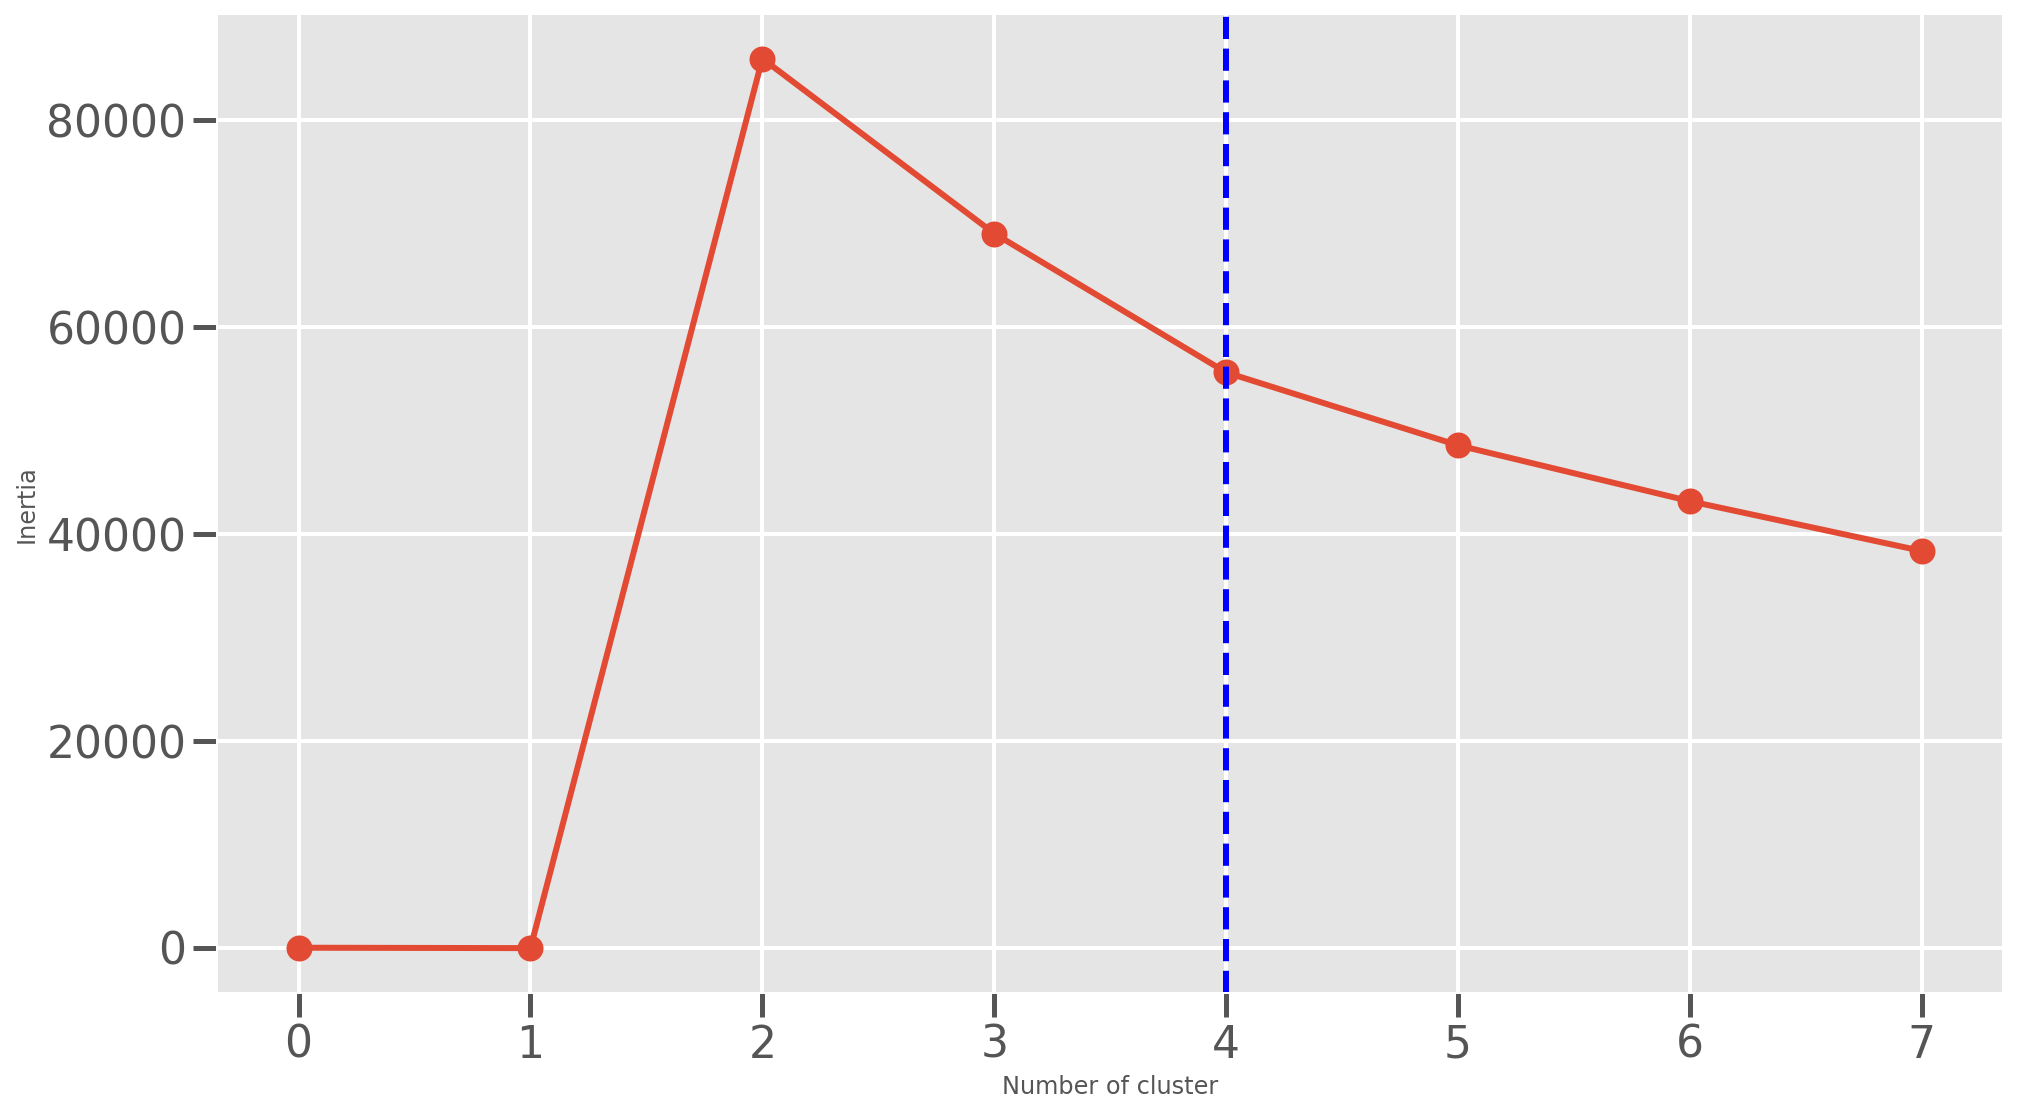

In [179]:
plt.plot(range(0,8),inertia_list,'-o')
plt.xlabel('Number of cluster')
plt.axvline(x=4, color='blue', linestyle='--')
plt.ylabel('Inertia')
plt.show()

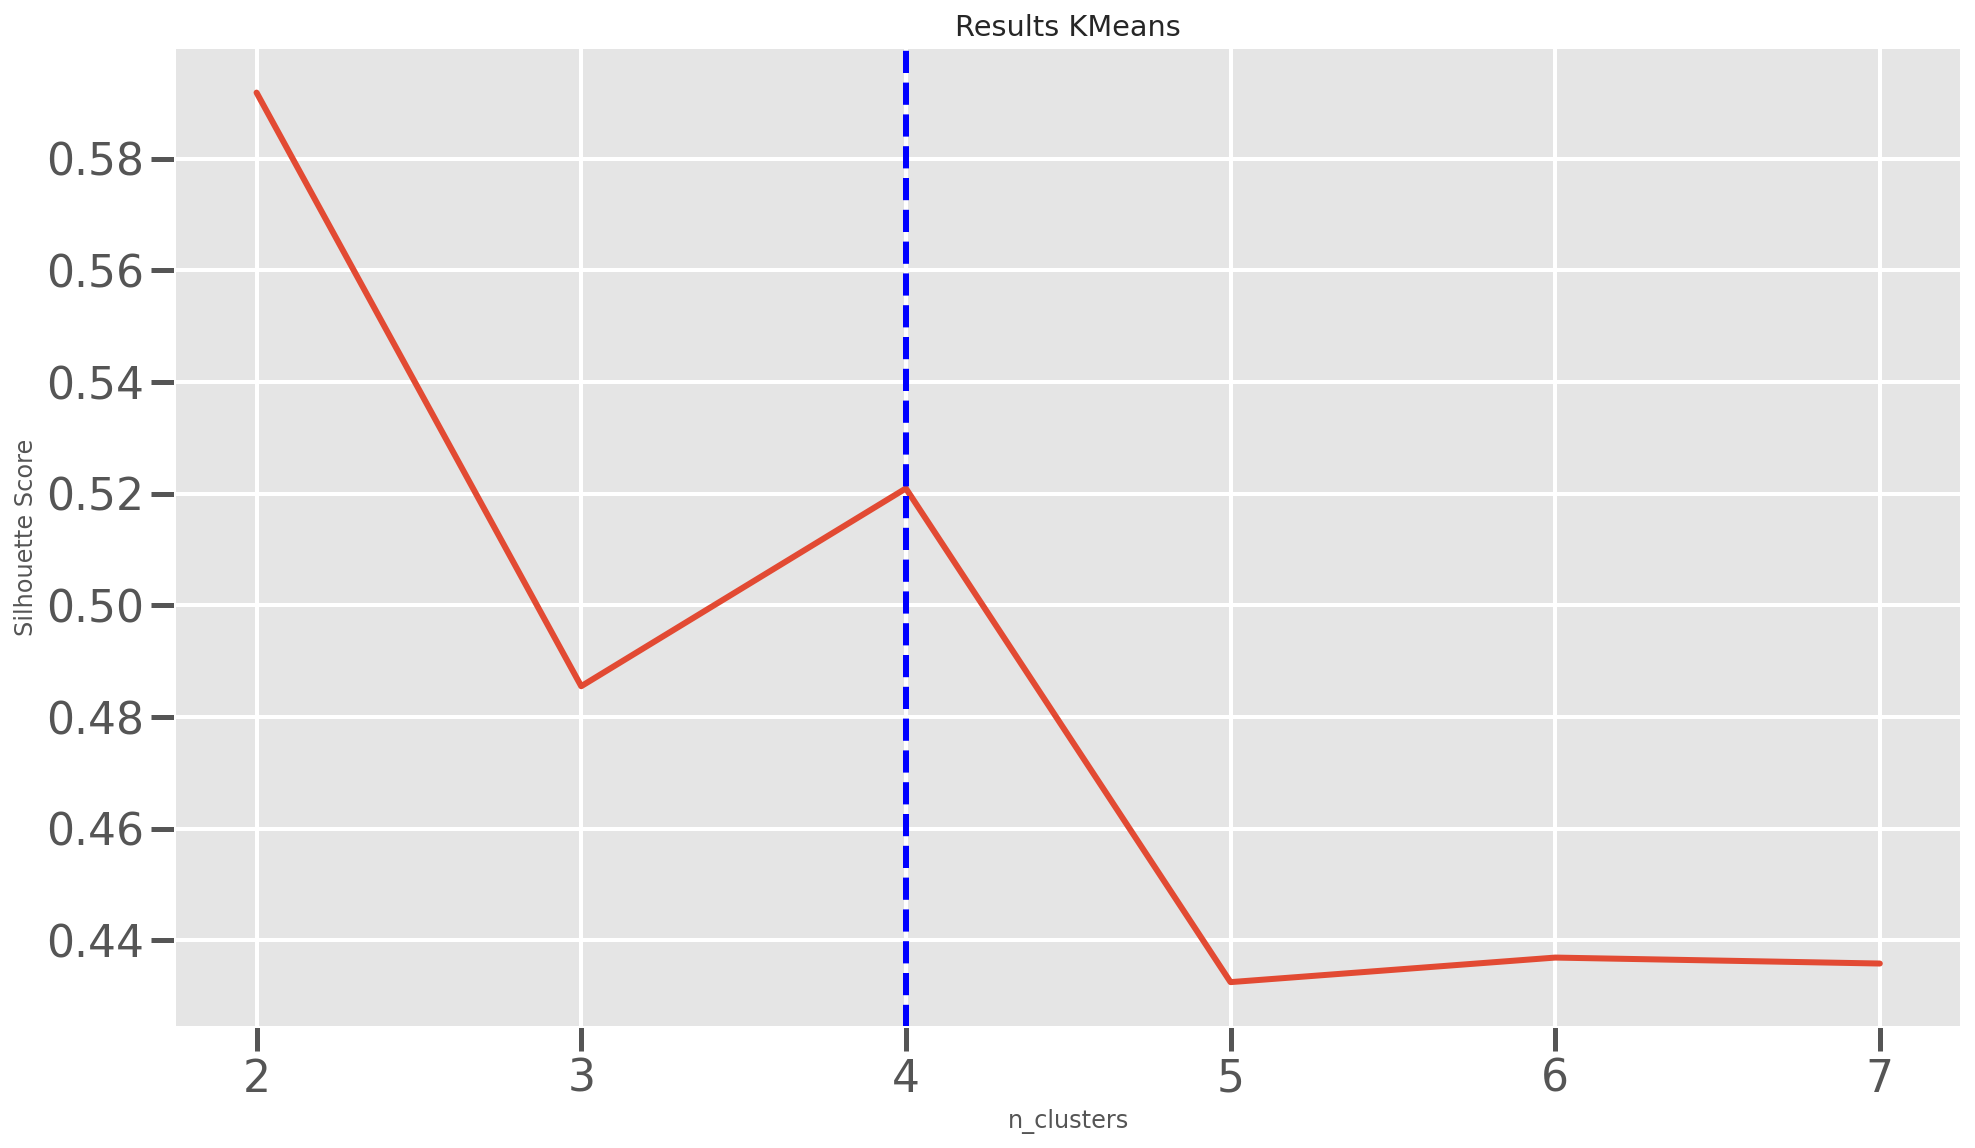

In [180]:
plt.plot(range(2,8), scores);
plt.title('Results KMeans')
plt.xlabel('n_clusters');
plt.axvline(x=4, color='blue', linestyle='--')
plt.ylabel('Silhouette Score');
plt.show()

In [181]:
from sklearn.cluster import KMeans

clusterer = KMeans(n_clusters=8,random_state=30).fit(tocluster)
centers = clusterer.cluster_centers_
c_preds = clusterer.predict(tocluster)
print(centers)

[[ 2.67449857 -1.68694538  1.07594988]
 [ 3.27599644 -0.24927371 -1.94804194]
 [ 0.02906239  1.28555009 -0.11206552]
 [ 0.39862136 -0.67952413 -0.34952275]
 [-1.3715556  -0.10793211  0.12655079]
 [ 9.79794048  3.68450856  1.5742031 ]
 [ 7.46258396 -2.6555609   0.93762065]
 [ 2.65603961  3.16400757  0.69953992]]


2021-11-04 07:44:16 [matplotlib.axes._base] DEBUG: not adjusting title pos because a title was already placed manually: 0.920000
2021-11-04 07:44:16 [matplotlib.axes._base] DEBUG: title position was updated manually, not adjusting
2021-11-04 07:44:16 [matplotlib.axes._base] DEBUG: title position was updated manually, not adjusting
2021-11-04 07:44:16 [matplotlib.axes._base] DEBUG: title position was updated manually, not adjusting
2021-11-04 07:44:16 [matplotlib.axes._base] DEBUG: title position was updated manually, not adjusting
2021-11-04 07:44:17 [matplotlib.axes._base] DEBUG: title position was updated manually, not adjusting


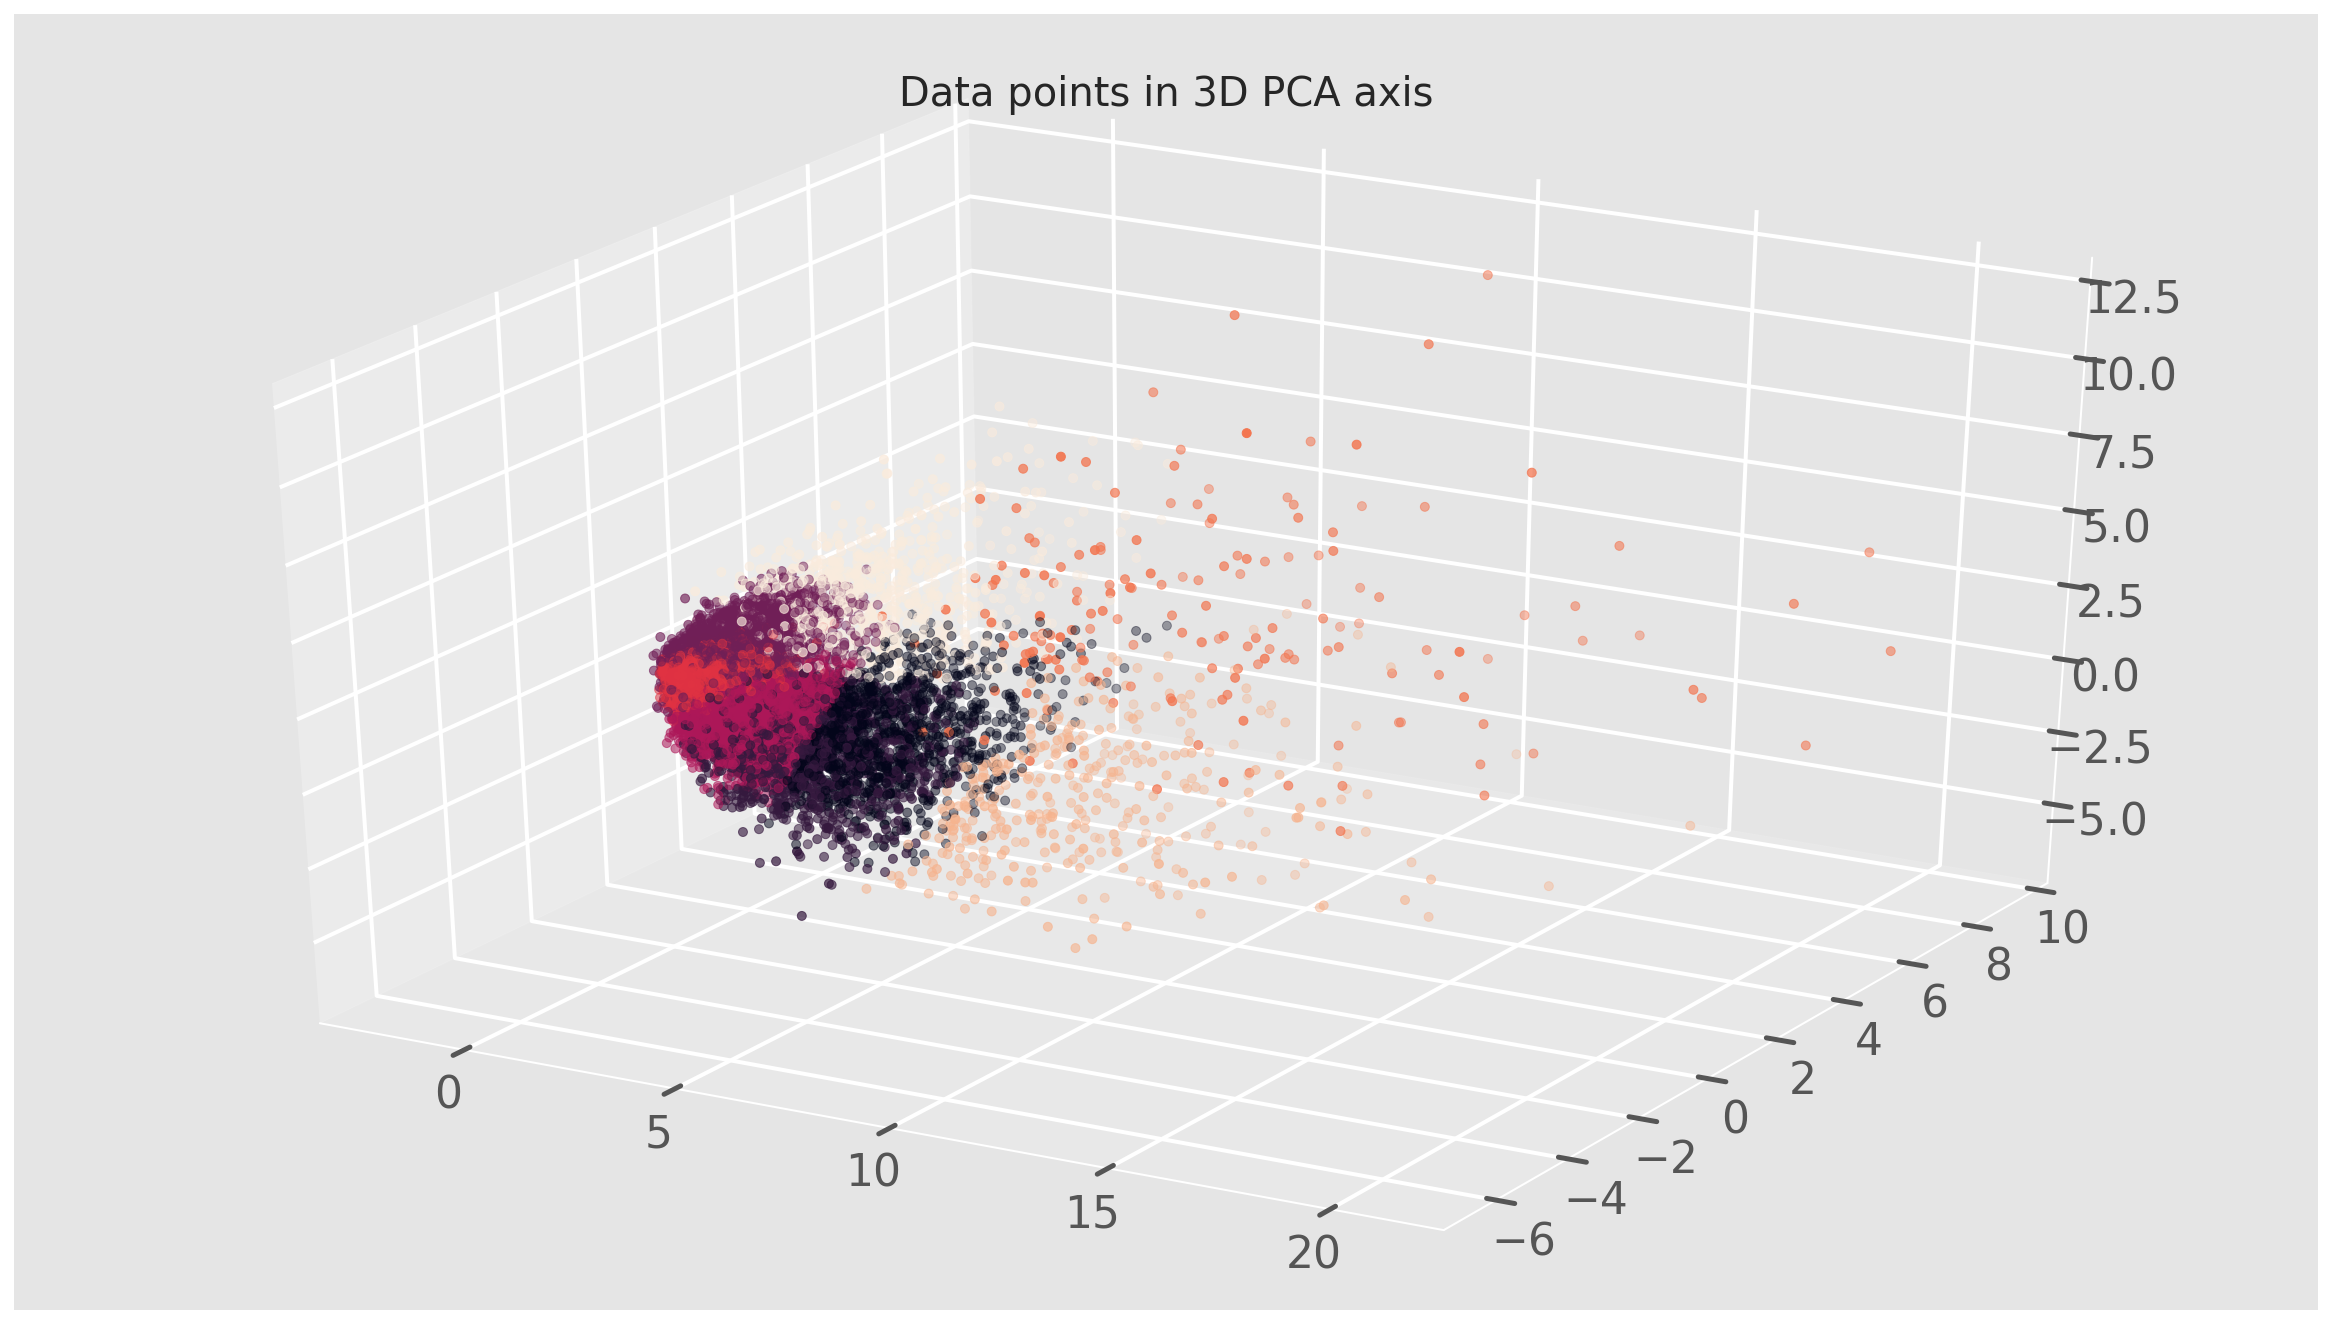

In [182]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(tocluster[0], tocluster[2], tocluster[1], c = c_preds)
plt.title('Data points in 3D PCA axis', fontsize=20)
plt.show()

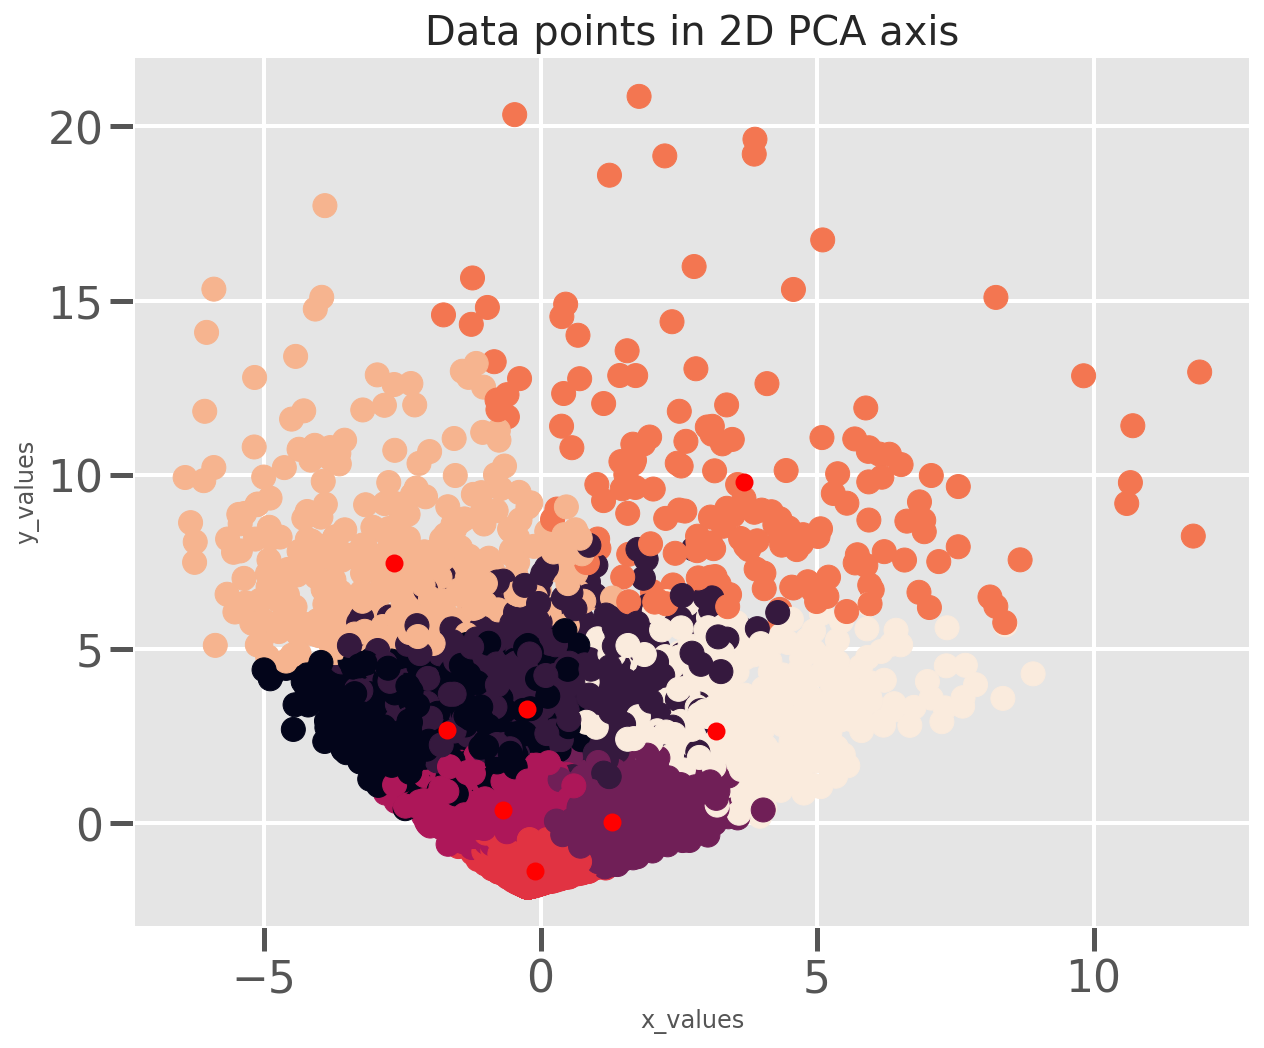

In [183]:
fig = plt.figure(figsize=(10,8))
plt.scatter(tocluster[1],tocluster[0],c = c_preds)
for ci,c in enumerate(centers):
    plt.plot(c[1], c[0], 'o', markersize=8, color='red', alpha=1)

plt.xlabel('x_values')
plt.ylabel('y_values')

plt.title('Data points in 2D PCA axis', fontsize=20)
plt.show()

In [184]:
user_anime['cluster'] = c_preds

In [185]:
#Está algo pesadito nuestro df...
user_anime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 1 to 20000
Columns: 7853 entries, &quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hatsukoi to cluster
dtypes: int32(1), int64(7852)
memory usage: 1.2 GB


In [186]:
def createAnimeInfoList(animelist):
    episode_list = list()
    genre_list = list()
    member_list = list()
    rating_list= list()
    for x in anime['name']:
        if x in animelist:
            episode_list.append(anime[anime['name']==x].episodes.values.astype(int))
            member_list.append(anime[anime['name']==x].members.values.astype(int))
            rating_list.append(anime[anime['name']==x].rating.values.astype(int))
            for y in anime[anime['name']==x].genre.values:
                 genre_list.append(y)
    return genre_list,episode_list,rating_list,member_list

In [187]:
def count_word(df, ref_col, liste):
    keyword_count = dict()
    for s in liste: keyword_count[s] = 0
    for liste_keywords in df[ref_col].str.split(','):        
        if type(liste_keywords) == float and pd.isnull(liste_keywords): continue        
        for s in [s for s in liste_keywords if s in liste]: 
            if pd.notnull(s): keyword_count[s] += 1
    #______________________________________________________________________
    # convert the dictionary in a list to sort the keywords by frequency
    keyword_occurences = []
    for k,v in keyword_count.items():
        keyword_occurences.append([k,v])
    keyword_occurences.sort(key = lambda x:x[1], reverse = True)
    return keyword_occurences, keyword_count

In [188]:
c0 = user_anime[user_anime['cluster']==0].drop('cluster',axis=1).mean()

In [189]:
c0.sort_values(ascending=False)[0:15]

name
Sword Art Online                0.784545
No Game No Life                 0.699091
Angel Beats!                    0.689091
Shingeki no Kyojin              0.674545
Toradora!                       0.590000
High School DxD                 0.589091
Mirai Nikki (TV)                0.585455
Highschool of the Dead          0.542727
Sakurasou no Pet na Kanojo      0.540909
Guilty Crown                    0.524545
Death Note                      0.522727
Hataraku Maou-sama!             0.518182
Date A Live                     0.510000
High School DxD New             0.506364
Boku wa Tomodachi ga Sukunai    0.497273
dtype: float64

In [190]:
animelist = list(c0.index)
data = pd.DataFrame()

In [191]:
data['genre'],data['episode'],data['rating'],data['member'] = createAnimeInfoList(animelist)

In [192]:
set_keywords = set()
for liste_keywords in data['genre'].str.split(',').values:
    if isinstance(liste_keywords, float): continue  # only happen if liste_keywords = NaN
    set_keywords = set_keywords.union(liste_keywords)

In [193]:
!pip install wordcloud
from wordcloud import WordCloud

In [194]:
def makeCloud(Dict,name,color):
    words = dict()
    for s in Dict:
        words[s[0]] = s[1]
        wordcloud = WordCloud(
                      width=1500,
                      height=500, 
                      background_color=color, 
                      max_words=20,
                      max_font_size=500, 
                      normalize_plurals=False)
        wordcloud.generate_from_frequencies(words)
    fig = plt.figure(figsize=(12, 8))
    plt.title(name)
    plt.imshow(wordcloud)
    plt.axis('off')

    plt.show()

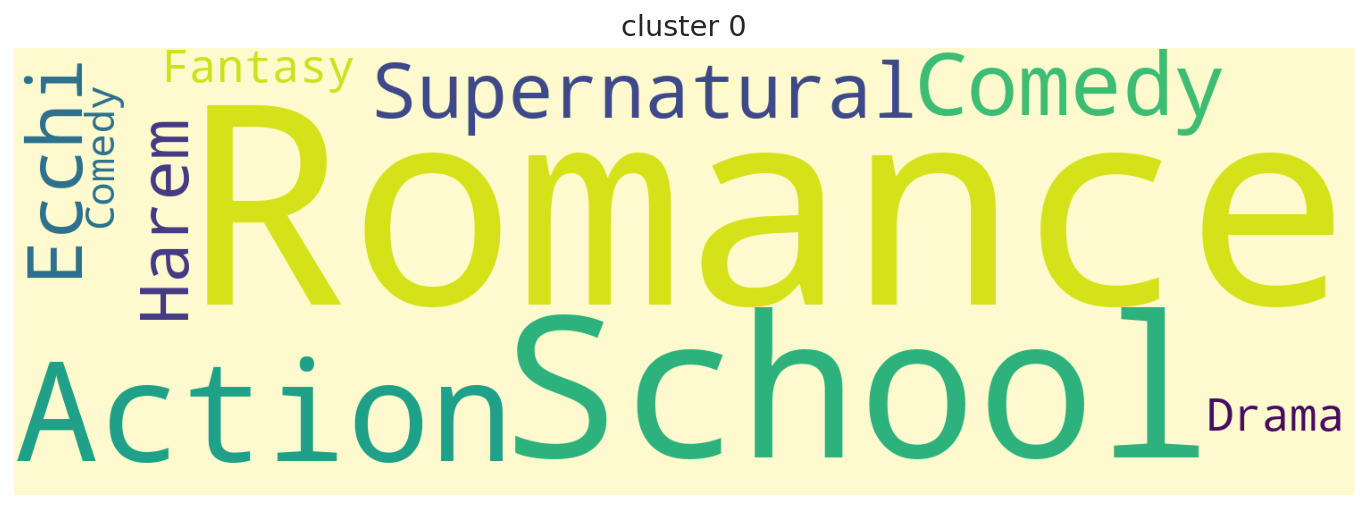

In [195]:
c0_animelist = list(c0.sort_values(ascending=False)[0:15].index)
c0_data = pd.DataFrame()
c0_data['genre'],c0_data['episode'],c0_data['rating'],c0_data['member'] =  createAnimeInfoList(c0_animelist)
c0_data.iloc[:,1:4] = c0_data.iloc[:,1:4].astype(int) # change to numeric object to integer
keyword_occurences, dum = count_word(c0_data, 'genre', set_keywords)
makeCloud(keyword_occurences[0:10],"cluster 0","lemonchiffon")

In [196]:
keyword_occurences[0:10]

[[' Romance', 8],
 [' School', 7],
 ['Action', 7],
 ['Comedy', 6],
 [' Supernatural', 5],
 [' Ecchi', 5],
 [' Harem', 4],
 [' Fantasy', 4],
 [' Drama', 4],
 [' Comedy', 3]]

In [197]:
print('cluster 0\nAVG episode : {0}\nAVG movie rating : {1}\nAVG member : {2}'
      .format(c0_data['episode'].mean(), c0_data['rating'].mean(),c0_data['member'].mean()))

cluster 0
AVG episode : 18.8
AVG movie rating : 7.533333333333333
AVG member : 566196.1333333333


In [198]:
!pip install scrapy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.preprocessing import MaxAbsScaler
from sklearn.neighbors import NearestNeighbors
from scipy.stats import randint
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from scrapy import Selector
import requests
from scrapy.crawler import CrawlerProcess
import scrapy
from scrapy.utils.project import get_project_settings

In [199]:
user2 = user_anime.reset_index()
user2 = user2[['user_id', 'cluster']]

In [200]:
anime2 = pd.merge(anime, user, on="anime_id", how="left")
anime2

,anime_id,name,genre,type,episodes,rating,members,user_id,userRating,mean_rating
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,152.0,10.0,7.699301
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,244.0,10.0,8.729242
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,271.0,10.0,7.372287
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,322.0,10.0,8.356322
4,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,398.0,10.0,-0.832298
...,...,...,...,...,...,...,...,...,...,...
4264094,5543,Under World,Hentai,OVA,1,4.28,183,48766.0,-1.0,-1.000000
4264095,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219,48766.0,-1.0,-1.000000
4264096,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175,39532.0,-1.0,-1.000000
4264097,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175,48766.0,-1.0,-1.000000


In [201]:
anime2 = anime2.merge(user2)
helper = anime2[anime2['cluster'] == 0]
helper

,anime_id,name,genre,type,episodes,rating,members,user_id,userRating,mean_rating,cluster
573,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,462.0,8.0,7.374593,0
574,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572,462.0,9.0,7.374593,0
575,7311,Suzumiya Haruhi no Shoushitsu,"Comedy, Mystery, Romance, School, Sci-Fi, Supe...",Movie,1,8.81,240297,462.0,8.0,7.374593,0
576,1535,Death Note,"Mystery, Police, Psychological, Supernatural, ...",TV,37,8.71,1013917,462.0,10.0,7.374593,0
577,31043,Boku dake ga Inai Machi,"Mystery, Psychological, Seinen, Supernatural",TV,12,8.65,402381,462.0,9.0,7.374593,0
...,...,...,...,...,...,...,...,...,...,...,...
1113670,21431,Gokukoku no Brynhildr,"Drama, Mystery, Sci-Fi, Seinen",TV,13,7.09,159899,14460.0,10.0,9.380368,0
1113671,31442,Musaigen no Phantom World,"Action, Comedy, Fantasy, Slice of Life, Supern...",TV,13,7.03,168482,14460.0,10.0,9.380368,0
1113672,30749,Saijaku Muhai no Bahamut,"Action, Ecchi, Fantasy, Harem, Mecha, Romance,...",TV,12,6.87,94430,14460.0,10.0,9.380368,0
1113673,25397,Absolute Duo,"Action, Ecchi, Harem, Romance, School, Superna...",TV,12,6.78,168811,14460.0,10.0,9.380368,0


In [202]:
test = helper.sample(n = 10000)
test

,anime_id,name,genre,type,episodes,rating,members,user_id,userRating,mean_rating,cluster
888657,107,Ou Dorobou Jing,"Adventure, Comedy, Fantasy, Sci-Fi, Shounen",TV,13,7.34,21920,4226.0,8.0,7.811321,0
140706,20787,Black Bullet,"Action, Mystery, Sci-Fi, Seinen",TV,13,7.44,320267,2763.0,8.0,7.769492,0
410515,3588,Soul Eater,"Action, Adventure, Comedy, Fantasy, Shounen, S...",TV,51,8.08,580184,12653.0,-1.0,-1.000000,0
727497,376,Elfen Lied Special,"Drama, Ecchi, Horror, Psychological, Supernatural",Special,1,7.34,116129,14968.0,7.0,6.877049,0
1010508,18119,Servant x Service,"Comedy, Slice of Life",TV,13,7.79,81037,12804.0,10.0,8.643059,0
...,...,...,...,...,...,...,...,...,...,...,...
1054205,11741,Fate/Zero 2nd Season,"Action, Fantasy, Supernatural, Thriller",TV,12,8.73,340973,10837.0,10.0,7.122222,0
712668,72,Full Metal Panic? Fumoffu,"Action, Comedy, School",TV,12,8.21,171086,12880.0,9.0,7.076142,0
476995,7054,Kaichou wa Maid-sama!,"Comedy, Romance, School, Shoujo",TV,26,8.26,391628,15543.0,9.0,7.169444,0
915865,23321,Log Horizon 2nd Season,"Action, Adventure, Fantasy, Game, Magic, Shounen",TV,25,7.66,215817,9527.0,6.0,3.366013,0


In [203]:
anime_data = pd.concat([test["genre"].str.get_dummies(sep=","),
                           test["type"].str.get_dummies(sep=","),test[["rating"]],
                            test[["members"]],test["episodes"],test["cluster"]],axis=1)

anime_data

,Adventure,Cars,Comedy,Dementia,Demons,Drama,Ecchi,Fantasy,Game,Harem,Hentai,Historical,Horror,Josei,Kids,Magic,Martial Arts,Mecha,Military,Music,Mystery,Parody,Police,Psychological,Romance,Samurai,School,Sci-Fi,Seinen,Shoujo,Shoujo Ai,Shounen,Shounen Ai,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Vampire,Yaoi,Yuri,Action,Adventure,Cars,Comedy,Dementia,Demons,Drama,Ecchi,Fantasy,Game,Harem,Hentai,Historical,Horror,Josei,Kids,Magic,Mecha,Military,Music,Mystery,Parody,Psychological,Romance,School,Sci-Fi,Seinen,Shoujo,Shounen,Slice of Life,Sports,Yaoi,Movie,Music,ONA,OVA,Special,TV,rating,members,episodes,cluster
888657,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,7.34,21920,13,0
140706,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,7.44,320267,13,0
410515,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,8.08,580184,51,0
727497,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,7.34,116129,1,0
1010508,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,7.79,81037,13,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1054205,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,8.73,340973,12,0
712668,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,8.21,171086,12,0
476995,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,8.26,391628,26,0
915865,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,7.66,215817,25,0


In [204]:
anime_data = MaxAbsScaler().fit_transform(anime_data)
anime_data

array([[0.        , 0.        , 1.        , ..., 0.02161913, 0.00727476,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.31587102, 0.00727476,
        0.        ],
       [1.        , 0.        , 1.        , ..., 0.57222041, 0.02853945,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.38625252, 0.01454952,
        0.        ],
       [1.        , 0.        , 0.        , ..., 0.2128547 , 0.01398993,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.22429548, 0.00671517,
        0.        ]])

In [205]:
KNNanime = NearestNeighbors(n_neighbors=8, algorithm='ball_tree').fit(anime_data)
distances, indices = KNNanime.kneighbors(anime_data)

In [206]:
def nombres_indices(name):  # Toma el nombre del anime y devuelve su indice correspondiente
    return anime[anime["name"]==name].index.tolist()[0] 

In [207]:
def recomendados_por_anime(nombre):  # Muestra el grupo de animes más cercanos al consultado
    found_id = nombres_indices(nombre)
    for id in indices[found_id][1:]:
        print(anime.loc[id]["name"])
            
recomendados_por_anime("Naruto")

Naruto
Mukashi Toilet ga Kowakatta!
Dr. Slump: Arale-chan no Koutsuu Anzen
Mutsu Enmei Ryuu Gaiden: Shura no Toki
Push
Kaikan Phrase
Gene Diver


In [208]:
def similar_animes(id_anime):  # Trae todos los id_anime relacionados con un id_anime dado
    
    id_list=[]
    found_id = anime[anime["anime_id"]==id_anime].index.tolist()[0]  # Indice del id ingresado
    for id in indices[found_id][1:]:
            id_list.append(anime.loc[id]["anime_id"])
            
    return id_list  
        
            
def similar_animes_usuarios(id_user):  # Crea una lista con todos los animes relacionados con los animes visto por el usuario
    
    a = test[test["user_id"]==id_user].anime_id.values
    lista = []
    for i in range(len(a)):
        lista.append(similar_animes(a[i]))
    return lista
            
        
def similar_animes_usuarios_freq(id_user): # Crea una lista con los 6 anime más recomendados del usuario
    a=similar_animes_usuarios(id_user)
    r= np.array([])
    for i in range(5):
        f1 = pd.Series( (v[i] for v in a))
        r = np.append(r,f1)
        
    gh = test[test["user_id"]==id_user].anime_id.values
    rdiff=np.setdiff1d(r, gh)
    kk = pd.DataFrame({'Column1':rdiff})
    pda = pd.crosstab(index=kk["Column1"].astype(int), columns= "count")
    pda2 = pda.sort_values("count", ascending=False).head(6).index.tolist() 
    
    return pda2
        
    
def recomendados_usuario(id_user):  # Pasa de anime_id a los nombres de los animé
    
    a=similar_animes_usuarios_freq(id_user)
    for id in a:
        print(anime[anime["anime_id"]==id]["name"].values)

In [209]:
recomendados_usuario(9487)

['Peach Girl']
['Nichijou: Nichijou no 0-wa']
['Go! Princess Precure']
['Kuroshitsuji: Book of Circus']
['Fuuun Ishin Dai☆Shogun']
['Kantai Collection: KanColle']


In [210]:
anime = pd.read_csv('anime.csv')
rating = pd.read_csv('rating.csv')

In [211]:
anime.replace("Unknown", np.nan, inplace=True)
anime["episodes"] = anime["episodes"].astype(float)

In [212]:
nombres= anime[anime.isnull().any(axis=1)]
nombres = nombres["name"].values.tolist()

tipoAnime=pd.get_dummies(anime["type"]).columns
tipoAnime=tipoAnime.str.strip().unique().tolist()

genero=anime["genre"].str.get_dummies(sep=",").columns
genero=genero.str.strip().unique().tolist()

In [213]:
buscarURL = 'https://myanimelist.net/search/all?q='
urlAnime = []
for i in nombres:
    urlAnime.append(buscarURL + i)


class AnimeFcSpider(scrapy.Spider):
    name = 'anime_fc'

    def start_requests(self):  # start_requests method
        for url2 in urlAnime:
            yield scrapy.Request(url=url2,
                                 callback=self.parse_front)

    def parse_front(self, response):  # First parsing method
        course_links = response.xpath('//div[@class="picSurround di-tc thumb"]/a/@href')
        yield response.follow(url=course_links[0],
                              callback=self.parse_pages)

    def parse_pages(self, response):  # Second parsing method
        crs_name = response.xpath('//h1[@class="h1"]/span/text()').extract_first()
        crs_episodes = response.xpath('//td[@class="spaceit"]/span[@id="curEps"]/text()').extract_first()
        crs_rating = response.xpath('//span[@itemprop="ratingValue"]/text()').extract_first()
        crs_id = response.xpath('//input[@name="aid"]/@value').extract_first()

        crs_genre = response.xpath('//div/a/@title').extract()
        crs_genre = np.intersect1d(crs_genre, genero)
        crs_genre = ','.join(map(str, crs_genre))

        crs_type = response.xpath('//div/a/text()').extract()
        crs_type = np.intersect1d(crs_type,tipoAnime)
        crs_type = ','.join(map(str, crs_type))
       

        list_name.append(crs_name)
        list_genre.append(crs_genre)
        list_type.append(crs_type)
        list_episodes.append(crs_episodes)
        list_rating.append(crs_rating)
        list_id.append(crs_id)



list_name = list()
list_genre = list()
list_type = list()
list_episodes = list()
list_rating = list()
list_id = list()

s = get_project_settings()
s['CONCURRENT_REQUESTS_PER_IP'] = 16
s['CONCURRENT_REQUESTS_PER_DOMAIN '] = 16
s['DOWNLOAD_DELAY'] = 2.5
s['CONCURRENT_REQUESTS'] = 32
s['CONCURRENT_REQUESTS'] = 32


process = CrawlerProcess(s)  # Run the Spider
process.crawl(AnimeFcSpider)
process.start()

2021-11-04 07:45:36 [scrapy.utils.log] INFO: Scrapy 2.5.1 started (bot: scrapybot)
2021-11-04 07:45:36 [scrapy.utils.log] INFO: Versions: lxml 4.2.6.0, libxml2 2.9.8, cssselect 1.1.0, parsel 1.6.0, w3lib 1.22.0, Twisted 21.7.0, Python 3.7.12 (default, Sep 10 2021, 00:21:48) - [GCC 7.5.0], pyOpenSSL 21.0.0 (OpenSSL 1.1.1l  24 Aug 2021), cryptography 35.0.0, Platform Linux-5.4.104+-x86_64-with-Ubuntu-18.04-bionic
2021-11-04 07:45:36 [scrapy.utils.log] DEBUG: Using reactor: twisted.internet.epollreactor.EPollReactor
2021-11-04 07:45:36 [scrapy.crawler] INFO: Overridden settings:
{'CONCURRENT_REQUESTS': 32,
 'CONCURRENT_REQUESTS_PER_IP': 16,
 'DOWNLOAD_DELAY': 2.5}
2021-11-04 07:45:36 [scrapy.extensions.telnet] INFO: Telnet Password: d00c52a8307af0d4
2021-11-04 07:45:36 [scrapy.middleware] INFO: Enabled extensions:
['scrapy.extensions.corestats.CoreStats',
 'scrapy.extensions.telnet.TelnetConsole',
 'scrapy.extensions.memusage.MemoryUsage',
 'scrapy.extensions.logstats.LogStats']
2021-11-0

ReactorNotRestartable: ignored

In [ ]:
DataNa = pd.DataFrame({"anime_id":list_id, "name":list_name,"genre":list_genre,
                       "type":list_type, "episodes":list_episodes, "rating":list_rating})

DataNa.replace("", np.nan, inplace=True)
DataNa.replace('?', np.nan, inplace=True)

print(DataNa.shape)
print(DataNa.isnull().sum())
DataNa.head(10)

In [ ]:
DataNa["anime_id"] = DataNa["anime_id"].astype(float)
DataNa["episodes"] = DataNa["episodes"].astype(float)
DataNa["rating"] = DataNa["rating"].astype(float)
DataNa.info()

In [ ]:
dataNueva= pd.merge(anime, DataNa,left_on="anime_id",right_on="anime_id", how="left")
dataNueva.info()
print(anime.isnull().sum())
print(anime[anime.isnull().any(axis=1)].shape)

In [ ]:
dataNueva.loc[dataNueva["genre_x"].isna(),"genre_x"] = dataNueva["genre_y"]
dataNueva.loc[dataNueva["type_x"].isna(),"type_x"] = dataNueva["type_y"]
dataNueva.loc[dataNueva["episodes_x"].isna(),"episodes_x"] = dataNueva["episodes_y"]
dataNueva.loc[dataNueva["rating_x"].isna(),"rating_x"] = dataNueva["rating_y"]

In [ ]:
dataNueva.drop(["name_y", "genre_y", "type_y", "episodes_y", "rating_y"],axis=1,inplace=True)
dataNueva.columns = dataNueva.columns.str.replace('_x', '')

print(dataNueva.isnull().sum())
print(dataNueva[dataNueva.isnull().any(axis=1)].shape)

In [ ]:
anime=dataNueva.copy()
print(anime.groupby("type")["episodes"].describe())

anime.loc[(anime["type"]=="OVA") & (anime["episodes"].isna()),"episodes"] = anime.loc[(anime["type"]=="OVA") ,"episodes"].median()
anime.loc[(anime["type"]=="Movie") & (anime["episodes"].isna()),"episodes"] = anime.loc[(anime["type"]=="Movie") ,"episodes"].median()
anime.loc[(anime["type"]=="Music") & (anime["episodes"].isna()),"episodes"] = anime.loc[(anime["type"]=="Music") ,"episodes"].median()
anime.loc[(anime["type"]=="ONA") & (anime["episodes"].isna()),"episodes"] = anime.loc[(anime["type"]=="ONA") ,"episodes"].median()
anime.loc[(anime["type"]=="Special") & (anime["episodes"].isna()),"episodes"] = anime.loc[(anime["type"]=="Special") ,"episodes"].median()
anime.loc[(anime["type"]=="TV") & (anime["episodes"].isna()),"episodes"] = anime.loc[(anime["type"]=="TV") ,"episodes"].median()
anime.loc[(anime["type"].isna()) & (anime["episodes"].isna()),"episodes"] = anime["episodes"].median()

print(anime[anime.isnull().any(axis=1)].shape)
print(anime.isnull().sum())

In [ ]:
anime=anime.reset_index()

In [ ]:
anime_data = pd.concat([anime["genre"].str.get_dummies(sep=","),
                           anime["type"].str.get_dummies(sep=","),anime[["rating"]],
                            anime[["members"]],anime["episodes"]],axis=1)

anime_data.head()

In [ ]:
anime_data = MaxAbsScaler().fit_transform(anime_data)
anime_data

In [ ]:
KNNanime = NearestNeighbors(n_neighbors=7, algorithm='ball_tree').fit(anime_data)
distances, indices = KNNanime.kneighbors(anime_data)

In [ ]:
def nombres_indices(name):  # Toma el nombre del anime y devuelve su indice correspondiente
    return anime[anime["name"]==name].index.tolist()[0] 

In [ ]:
def recomendados_por_anime(nombre):  # Muestra el grupo de animes más cercanos al consultado
    found_id = nombres_indices(nombre)
    for id in indices[found_id][1:]:
        print(anime.loc[id]["name"])
            
recomendados_por_anime("Naruto")
        

In [ ]:
merge = pd.merge(anime, rating, on="anime_id", how="left")
merge.head()

In [ ]:
def similar_animes(id_anime):  # Trae todos los id_anime relacionados con un id_anime dado
    
    id_list=[]
    found_id = anime[anime["anime_id"]==id_anime].index.tolist()[0]  # Indice del id ingresado
    for id in indices[found_id][1:]:
            id_list.append(anime.loc[id]["anime_id"])
            
    return id_list  
        
            
def similar_animes_usuarios(id_user):  # Crea una lista con todos los animes relacionados con los animes visto por el usuario
    
    a = merge[merge["user_id"]==id_user].anime_id.values
    lista = []
    for i in range(len(a)):
        lista.append(similar_animes(a[i]))
    return lista
            
        
def similar_animes_usuarios_freq(id_user): # Crea una lista con los 6 anime más recomendados del usuario
    a=similar_animes_usuarios(id_user)
    r= np.array([])
    for i in range(5):
        f1 = pd.Series( (v[i] for v in a))
        r = np.append(r,f1)
        
    gh = merge[merge["user_id"]==id_user].anime_id.values
    rdiff=np.setdiff1d(r, gh)
    kk = pd.DataFrame({'Column1':rdiff})
    pda = pd.crosstab(index=kk["Column1"].astype(int), columns= "count")
    pda2 = pda.sort_values("count", ascending=False).head(6).index.tolist() 
    
    return pda2
        
    
def recomendados_usuario(id_user):  # Pasa de anime_id a los nombres de los animé
    
    a=similar_animes_usuarios_freq(id_user)
    for id in a:
        print(anime[anime["anime_id"]==id]["name"].values)
        

In [ ]:
recomendados_usuario(3454)

In [ ]:
recomendados_por_anime("Pokemon")

---
---

# Sección 3

### Aplicación de modelos de DL
---

Tomando como referencia la información en la notebook <font color=red>"Unsupervised_Prediction"</font>, deberán utilizar los archivos de las imágenes en <font color=blue>"dataset"</font>, de los apartados <font color=magenta>covid y normal</font> (**podrían tratar de añadir más imágenes a cada tipo para mejorar los resultados**) y, finalmente, probar el modelo con imágenes del set de datos en la carpeta <font color=green>"test"</font> como punto de referencia.

Aplicaremos la red VGG16 (pero podrían ver la posibilidad de tratar de aplicar otro modelo de los que se encuentran en **tensorflow.keras.applications**).

Pueden tratar de jugar con la estructura definida en *"base model"*, siempre y cuando hayan visto el link que viene al final de ese apartado de dicha red VGG16.

-----
Podemos jugar un poco con la información de las inicialiaciones de las variables **INIT_LR, EPOCS, BS** para observar si hay o no mejoría en los resultados de entrenamiento.

Aplicar la técnica de DL y explicar su funcionamiento (**puede tardar desde 5 hasta 30 minutos aproximadamente; 5 minutos con los datos proporcionados, más tiempo en caso de añadir nuevas imágenes**).

----

En cada apartado, traten de explicar el proceso que se está llevando a cabo.

In [214]:
# import the necessary packages
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import argparse
import cv2
import os

In [215]:
# initialize the initial learning rate, number of epochs to train for,
# and batch size
INIT_LR = 1e-3
EPOCHS = 10
BS = 10

# grab the list of images in our dataset directory, then initialize
# the list of data (i.e., images) and class images
print("[INFO] loading images...")
imagePaths = list(paths.list_images("dataset/"))
data = []
labels = []

[INFO] loading images...


In [216]:
# loop over the image paths
for imagePath in imagePaths:
    # extract the class label from the filename
    label = imagePath.split(os.path.sep)[-2]

    # load the image, swap color channels, and resize it to be a fixed
    # 224x224 pixels while ignoring aspect ratio
    image = cv2.imread(imagePath)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (224, 224))

    # update the data and labels lists, respectively
    data.append(image)
    labels.append(label)

In [217]:
miniTest = list(paths.list_images("test/"))
test1 = []
test2 = []

In [218]:
for imageP in miniTest:
    lbl = imageP.split(os.path.sep)[-1]
    img = cv2.imread(imageP)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (224, 224))
    
     # update the data and labels lists, respectively
    test1.append(img)
    test2.append(lbl)

In [219]:
# convert the data and labels to NumPy arrays while scaling the pixel
# intensities to the range [0, 255]
data = np.array(data) / 255.0
labels = np.array(labels)

test1 = np.array(test1) / 255.0
test2 = np.array(test2)

# perform one-hot encoding on the labels
lbs = LabelBinarizer()
labels = lbs.fit_transform(labels)
labels = to_categorical(labels)

lbs2 = LabelBinarizer()
test2 = lbs2.fit_transform(test2)
test2 = to_categorical(test2)

In [220]:
print(labels)

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [221]:
data.shape

(50, 224, 224, 3)

In [222]:
# partition the data into training and testing splits using 80% of
# the data for training and the remaining 20% for testing
(trainX, testX, trainY, testY) = train_test_split(data, labels,
	test_size=0.20, stratify=labels, random_state=42)

# initialize the training data augmentation object
trainAug = ImageDataGenerator(
	rotation_range=15,
	fill_mode="nearest")

# load the VGG16 network, ensuring the head FC layer sets are left
# off
baseModel = VGG16(weights="imagenet", include_top=False,
	input_tensor=Input(shape=(224, 224, 3)))

In [223]:
# construct the head of the model that will be placed on top of the
# the base model
headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(4, 4))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(64, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(2, activation="softmax")(headModel)

In [224]:
# place the head FC model on top of the base model (this will become
# the actual model we will train)
model = Model(inputs=baseModel.input, outputs=headModel)

# loop over all layers in the base model and freeze them so they will
# *not* be updated during the first training process
for layer in baseModel.layers:
	layer.trainable = False

# compile our model
print("[INFO] compiling model...")
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="binary_crossentropy", optimizer=opt,
	metrics=["accuracy"])

[INFO] compiling model...


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [225]:
# train the head of the network
print("[INFO] training head...")
H = model.fit_generator(
	trainAug.flow(trainX, trainY, batch_size=BS),
	steps_per_epoch=len(trainX) // BS,
	validation_data=(testX, testY),
	validation_steps=len(testX) // BS,
	epochs=EPOCHS)

[INFO] training head...


/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
4/4 [==============================] - 27s 7s/step - loss: 0.7904 - accuracy: 0.5250 - val_loss: 0.6856 - val_accuracy: 0.5000
Epoch 2/10
4/4 [==============================] - 25s 7s/step - loss: 0.6991 - accuracy: 0.5750 - val_loss: 0.6662 - val_accuracy: 0.6000
Epoch 3/10
4/4 [==============================] - 25s 7s/step - loss: 0.7190 - accuracy: 0.5250 - val_loss: 0.6667 - val_accuracy: 0.6000
Epoch 4/10
4/4 [==============================] - 25s 7s/step - loss: 0.6536 - accuracy: 0.7000 - val_loss: 0.6690 - val_accuracy: 0.5000
Epoch 5/10
4/4 [==============================] - 25s 7s/step - loss: 0.6525 - accuracy: 0.5750 - val_loss: 0.6528 - val_accuracy: 0.7000
Epoch 6/10
4/4 [==============================] - 25s 7s/step - loss: 0.6336 - accuracy: 0.7000 - val_loss: 0.6395 - val_accuracy: 0.9000
Epoch 7/10
4/4 [==============================] - 25s 7s/step - loss: 0.6596 - accuracy: 0.5750 - val_loss: 0.6299 - val_accuracy: 1.0000
Epoch 8/10
4/4 [==================

In [226]:
# make predictions on the testing set
print("[INFO] evaluating network...")
predIdxs = model.predict(testX, batch_size=BS)

# for each image in the testing set we need to find the index of the
# label with corresponding largest predicted probability
predIdxs = np.argmax(predIdxs, axis=1)

# show a nicely formatted classification report
print(classification_report(testY.argmax(axis=1), predIdxs,
	target_names=lbs.classes_))

# compute the confusion matrix and and use it to derive the raw
# accuracy, sensitivity, and specificity
cm = confusion_matrix(testY.argmax(axis=1), predIdxs)
total = sum(sum(cm))
acc = (cm[0, 0] + cm[1, 1]) / total
sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1])

# show the confusion matrix, accuracy, sensitivity, and specificity
print(cm)
print("acc: {:.4f}".format(acc))
print("sensitivity: {:.4f}".format(sensitivity))
print("specificity: {:.4f}".format(specificity))

[INFO] evaluating network...
              precision    recall  f1-score   support

       covid       1.00      0.60      0.75         5
      normal       0.71      1.00      0.83         5

    accuracy                           0.80        10
   macro avg       0.86      0.80      0.79        10
weighted avg       0.86      0.80      0.79        10

[[3 2]
 [0 5]]
acc: 0.8000
sensitivity: 0.6000
specificity: 1.0000


[INFO] saving COVID-19 detector model...


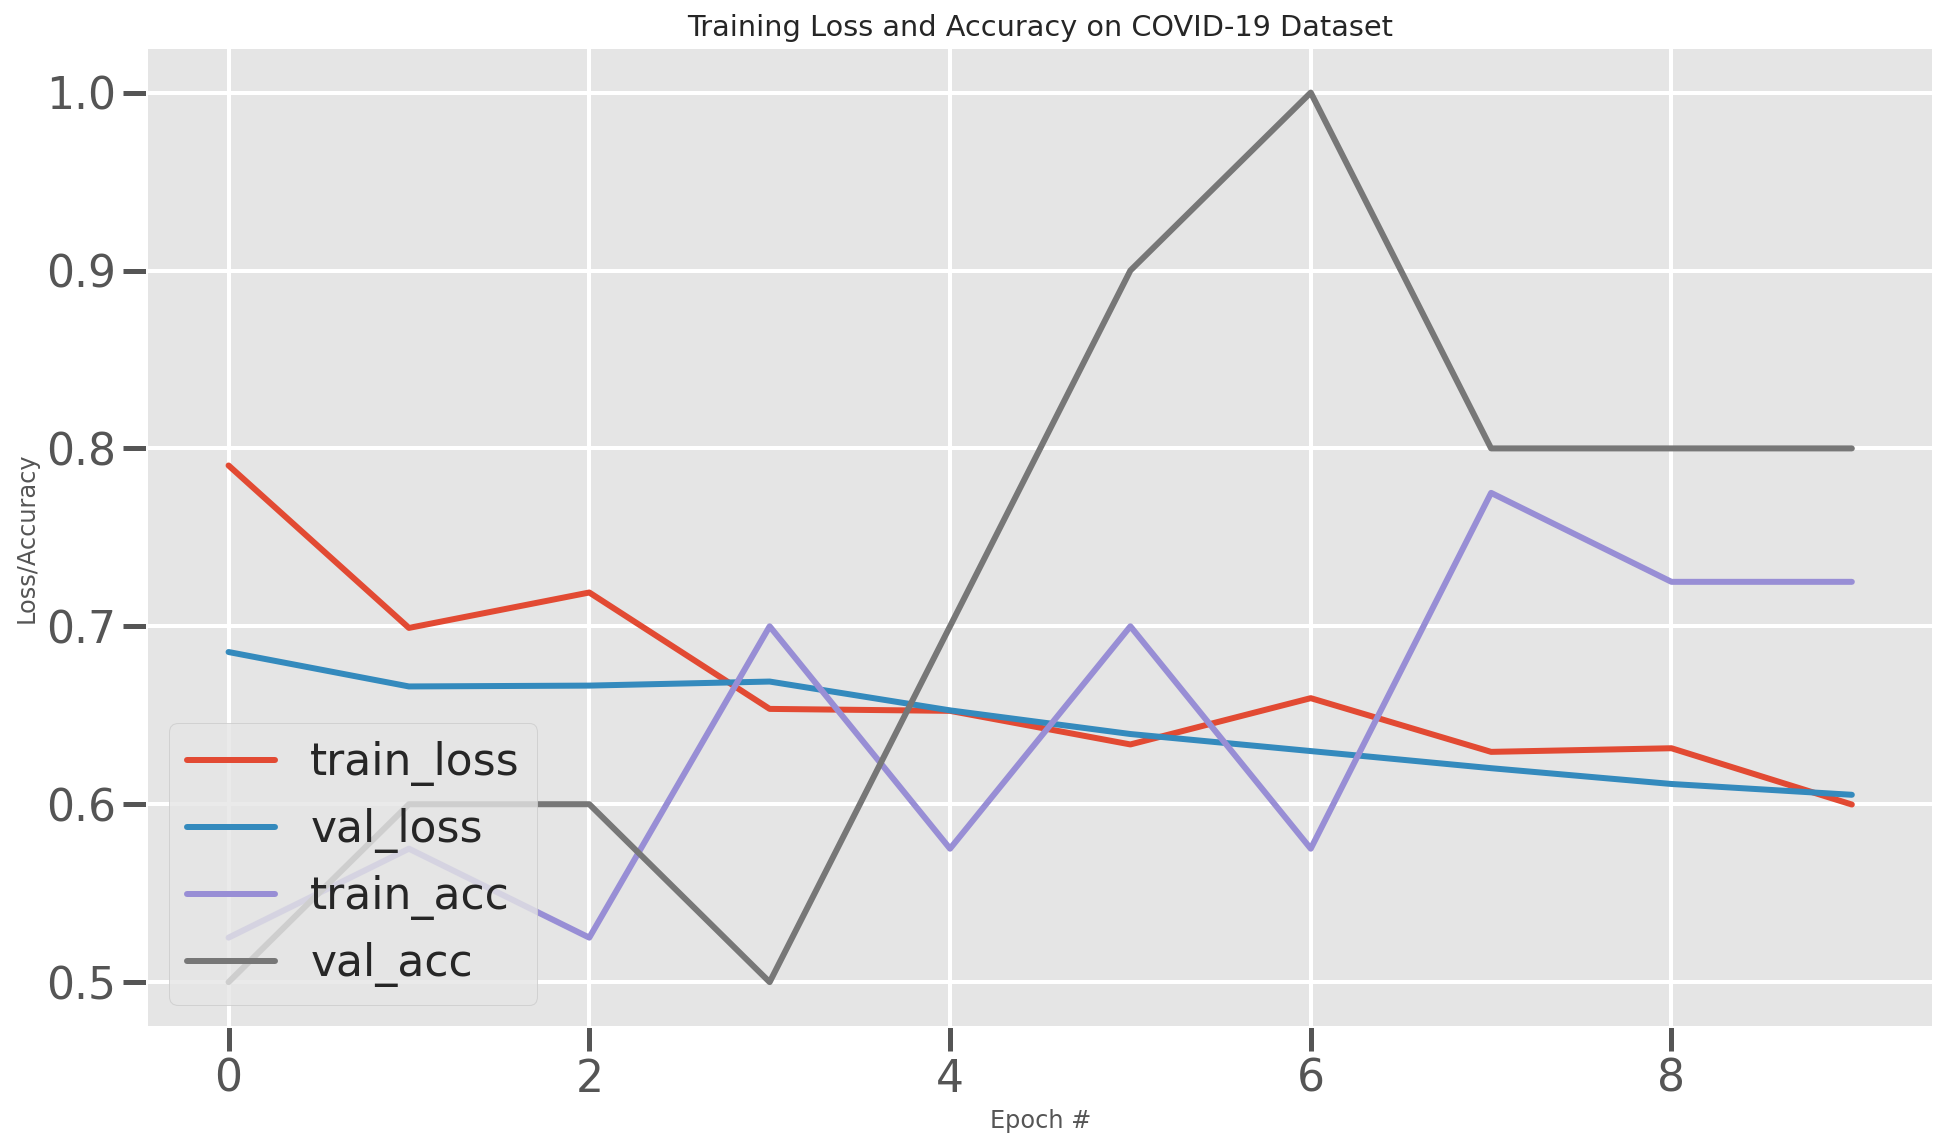

In [227]:
# plot the training loss and accuracy
N = EPOCHS
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy on COVID-19 Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig("results.png")

# serialize the model to disk
print("[INFO] saving COVID-19 detector model...")
model.save("testing.model", save_format="h5")

In [228]:
# make predictions on the testing set
print("[INFO] evaluating network...")
predIdxs = model.predict(testX, batch_size=BS)
# for each image in the testing set we need to find the index of the
# label with corresponding largest predicted probability
predIdxs = np.argmax(predIdxs, axis=1)
# show a nicely formatted classification report
print(classification_report(testY.argmax(axis=1), predIdxs, target_names=lbs.classes_))

[INFO] evaluating network...
              precision    recall  f1-score   support

       covid       1.00      0.60      0.75         5
      normal       0.71      1.00      0.83         5

    accuracy                           0.80        10
   macro avg       0.86      0.80      0.79        10
weighted avg       0.86      0.80      0.79        10



In [229]:
# compute the confusion matrix and and use it to derive the raw
# accuracy, sensitivity, and specificity
cm = confusion_matrix(testY.argmax(axis=1), predIdxs)
total = sum(sum(cm))
acc = (cm[0, 0] + cm[1, 1]) / total
sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
# show the confusion matrix, accuracy, sensitivity, and specificity
print(cm)
print("acc: {:.4f}".format(acc))
print("sensitivity: {:.4f}".format(sensitivity))
print("specificity: {:.4f}".format(specificity))

[[3 2]
 [0 5]]
acc: 0.8000
sensitivity: 0.6000
specificity: 1.0000


In [230]:
# make predictions on the testing set
print("[INFO] evaluating network...")
predIdxs = model.predict(test1, batch_size=BS)
predIdxs = np.argmax(predIdxs, axis=1)
# show a nicely formatted classification report
print(classification_report(test2.argmax(axis=1), predIdxs, target_names=lbs2.classes_))

[INFO] evaluating network...
              precision    recall  f1-score   support

    test.jpg       0.50      1.00      0.67         1
   test2.jpg       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
